In [1]:
%matplotlib inline
# Enabling reloading extension to use external python files
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import os
from datetime import date, datetime,timedelta
import math
import columns
import datasets
import seasons
import directory_utils

In [3]:
# Setup matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [4]:
data_frame = pd.read_csv(datasets.FIRST_CLEAN_DATA_SET_111_PATH, encoding=datasets.DEFAULT_CSV_ENCODING)

/home/felipepedroso/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data_frame.shape

(1046641, 19)

In [6]:
data_frame.columns

Index(['Cod', 'Ano', 'Dia Juliano', 'Hora - minuto',
       'Veloc. Instantânea do Vento a 5 metros (m/s)',
       'Veloc. Instantânea do Vento a 2 metros (m/s)',
       'Direção do Vento no instante da aquisição (°)',
       'Radiação Incidente total de 10 leituras (KW/m2)',
       'Radiação Refletida Total de 10 leituras (KW/m2)',
       'Fluxo Positivo de calor no solo total de 10 leituras (W/m2)',
       'Fluxo negativo de calor no solo . total de 10 leituras (W/m2)',
       'Umidade relativa Média (%)', 'Temperatura do Ar Média (°C)',
       'Temperatura do solo  1 Média (°C) à 3cm no solo',
       'Temperatura do solo 2Média (°C) à 6cm no solo ',
       'Temperatura do solo 3Média (°C) Colocado sensor de UV em 31/07/09',
       'Pressão (hPa)', 'Chuva total do período (mm)', 'Data'],
      dtype='object')

### Extracting daily information

In [7]:
daily_analysis_columns = [columns.TEMPERATURE,columns.HUMIDITY,columns.PRESSURE]

In [8]:
daily_average_from_columns = data_frame.groupby(columns.DATE)[daily_analysis_columns].mean()
daily_average_from_columns.head()

Temperatura do Ar Média (°C)  Umidade relativa Média (%)  \
Data                                                                   
1997-01-01                     22.875903                   80.237222   
1997-01-02                     21.545625                   79.303194   
1997-01-03                     20.179444                   82.070000   
1997-01-04                     22.125833                   83.748333   
1997-01-05                     23.178958                   84.473542   

            Pressão (hPa)  
Data                       
1997-01-01     942.916667  
1997-01-02     943.861111  
1997-01-03     945.409722  
1997-01-04     943.194444  
1997-01-05     942.729167

In [9]:
daily_max_from_columns = data_frame.groupby(columns.DATE)[daily_analysis_columns].max()
new_column_names = [columns.MAX_TEMP,columns.MAX_HUMIDITY,columns.MAX_PRESSURE]
daily_max_from_columns.columns = new_column_names
daily_max_from_columns.head()

Temperatura do Ar Máxima (°C)  Umidade relativa Máxima (%)  \
Data                                                                     
1997-01-01                          29.39                         98.1   
1997-01-02                          25.93                         88.7   
1997-01-03                          25.17                         95.0   
1997-01-04                          29.21                        100.0   
1997-01-05                          30.46                        100.0   

            Pressão Máxima (hPa)  
Data                              
1997-01-01                 945.0  
1997-01-02                 947.0  
1997-01-03                 947.0  
1997-01-04                 946.0  
1997-01-05                 945.0

In [10]:
daily_min_from_columns = data_frame.groupby(columns.DATE)[daily_analysis_columns].min()
new_column_names = [columns.MIN_TEMP,columns.MIN_HUMIDITY,columns.MIN_PRESSURE]
daily_min_from_columns.columns = new_column_names
daily_min_from_columns.head()

Temperatura do Ar Mínima (°C)  Umidade relativa Mínima (%)  \
Data                                                                     
1997-01-01                          18.53                        58.77   
1997-01-02                          19.21                        66.41   
1997-01-03                          17.88                        67.79   
1997-01-04                          17.85                        56.78   
1997-01-05                          18.06                        57.30   

            Pressão Mínima (hPa)  
Data                              
1997-01-01                 940.0  
1997-01-02                 942.0  
1997-01-03                 944.0  
1997-01-04                 941.0  
1997-01-05                 940.0

In [11]:
daily_analysis_data_frame = pd.merge(daily_max_from_columns,daily_min_from_columns, on=columns.DATE)
daily_analysis_data_frame = pd.merge(daily_analysis_data_frame, daily_average_from_columns, on=columns.DATE)
daily_analysis_data_frame.head()

Temperatura do Ar Máxima (°C)  Umidade relativa Máxima (%)  \
Data                                                                     
1997-01-01                          29.39                         98.1   
1997-01-02                          25.93                         88.7   
1997-01-03                          25.17                         95.0   
1997-01-04                          29.21                        100.0   
1997-01-05                          30.46                        100.0   

            Pressão Máxima (hPa)  Temperatura do Ar Mínima (°C)  \
Data                                                              
1997-01-01                 945.0                          18.53   
1997-01-02                 947.0                          19.21   
1997-01-03                 947.0                          17.88   
1997-01-04                 946.0                          17.85   
1997-01-05                 945.0                          18.06   

            Umidade relativa Mínima (%)  Pressão Mínima (hPa)  \
Data                                                            
1997-01-01                        58.77                 940.0   
1997-01-02                        66.41                 942.0   
1997-01-03                        67.79                 944.0   
1997-01-04                        56.78                 941.0   
1997-01-05                        57.30                 940.0   

            Temperatura do Ar Média (°C)  Umidade relativa Média (%)  \
Data                                                                   
1997-01-01                     22.875903                   80.237222   
1997-01-02                     21.545625                   79.303194   
1997-01-03                     20.179444                   82.070000   
1997-01-04                     22.125833                   83.748333   
1997-01-05                     23.178958                   84.473542   

            Pressão (hPa)  
Data                       
1997-01-01     942.916667  
1997-01-02     943.861111  
1997-01-03     945.409722  
1997-01-04     943.194444  
1997-01-05     942.729167

In [12]:
daily_analysis_data_frame[columns.VARIATION_TEMP] = daily_analysis_data_frame[columns.MAX_TEMP]-daily_analysis_data_frame[columns.MIN_TEMP]
daily_analysis_data_frame[columns.VARIATION_HUMIDITY] = daily_analysis_data_frame[columns.MAX_HUMIDITY]-daily_analysis_data_frame[columns.MIN_HUMIDITY]
daily_analysis_data_frame[columns.VARIATION_PRESSURE] = daily_analysis_data_frame[columns.MAX_PRESSURE]-daily_analysis_data_frame[columns.MIN_PRESSURE]
daily_analysis_data_frame.head()

Temperatura do Ar Máxima (°C)  Umidade relativa Máxima (%)  \
Data                                                                     
1997-01-01                          29.39                         98.1   
1997-01-02                          25.93                         88.7   
1997-01-03                          25.17                         95.0   
1997-01-04                          29.21                        100.0   
1997-01-05                          30.46                        100.0   

            Pressão Máxima (hPa)  Temperatura do Ar Mínima (°C)  \
Data                                                              
1997-01-01                 945.0                          18.53   
1997-01-02                 947.0                          19.21   
1997-01-03                 947.0                          17.88   
1997-01-04                 946.0                          17.85   
1997-01-05                 945.0                          18.06   

            Umidade relativa Mínima (%)  Pressão Mínima (hPa)  \
Data                                                            
1997-01-01                        58.77                 940.0   
1997-01-02                        66.41                 942.0   
1997-01-03                        67.79                 944.0   
1997-01-04                        56.78                 941.0   
1997-01-05                        57.30                 940.0   

            Temperatura do Ar Média (°C)  Umidade relativa Média (%)  \
Data                                                                   
1997-01-01                     22.875903                   80.237222   
1997-01-02                     21.545625                   79.303194   
1997-01-03                     20.179444                   82.070000   
1997-01-04                     22.125833                   83.748333   
1997-01-05                     23.178958                   84.473542   

            Pressão (hPa)  Variação da Temperatura do Ar (°C)  \
Data                                                            
1997-01-01     942.916667                               10.86   
1997-01-02     943.861111                                6.72   
1997-01-03     945.409722                                7.29   
1997-01-04     943.194444                               11.36   
1997-01-05     942.729167                               12.40   

            Variação da Umidade relativa (%)  Variação da Pressão (hPa)  
Data                                                                     
1997-01-01                             39.33                        5.0  
1997-01-02                             22.29                        5.0  
1997-01-03                             27.21                        3.0  
1997-01-04                             43.22                        5.0  
1997-01-05                             42.70                        5.0

In [13]:
daily_analysis_data_frame.index = pd.to_datetime(daily_analysis_data_frame.index, format='%Y-%m-%d', utc=True)
daily_analysis_data_frame[columns.DAY_OF_YEAR] = daily_analysis_data_frame.index.map(lambda date: date.timetuple().tm_yday)
daily_analysis_data_frame[columns.YEAR] = daily_analysis_data_frame.index.map(lambda date: date.year)
daily_analysis_data_frame[columns.MONTH] = daily_analysis_data_frame.index.map(lambda date: date.month)
daily_analysis_data_frame[columns.DAY] = daily_analysis_data_frame.index.map(lambda date: date.day)
daily_analysis_data_frame[columns.SEASON] = daily_analysis_data_frame.index.map(lambda date: seasons.get_season(date))

In [14]:
min_amount_days_window = 15
window_delta_amount = math.ceil((min_amount_days_window / 2)-1)
window_delta = timedelta(days=window_delta_amount)
quantile_value = 0.9

def get_quantile(index, column):
    begin_date = index - window_delta
    end_date = index + window_delta
    data_window = daily_analysis_data_frame.loc[begin_date:end_date]
    return data_window[column].quantile(quantile_value)

daily_analysis_data_frame[columns.QUANTILE_MAX_TEMP_FIFTEEN_DAYS] = daily_analysis_data_frame.index.map(lambda index: get_quantile(index, columns.MAX_TEMP))

daily_analysis_data_frame[columns.QUANTILE_MIN_TEMP_FIFTEEN_DAYS] = daily_analysis_data_frame.index.map(lambda index: get_quantile(index,columns.MIN_TEMP))

daily_analysis_data_frame.head()

Temperatura do Ar Máxima (°C)  \
Data                                                       
1997-01-01 00:00:00+00:00                          29.39   
1997-01-02 00:00:00+00:00                          25.93   
1997-01-03 00:00:00+00:00                          25.17   
1997-01-04 00:00:00+00:00                          29.21   
1997-01-05 00:00:00+00:00                          30.46   

                           Umidade relativa Máxima (%)  Pressão Máxima (hPa)  \
Data                                                                           
1997-01-01 00:00:00+00:00                         98.1                 945.0   
1997-01-02 00:00:00+00:00                         88.7                 947.0   
1997-01-03 00:00:00+00:00                         95.0                 947.0   
1997-01-04 00:00:00+00:00                        100.0                 946.0   
1997-01-05 00:00:00+00:00                        100.0                 945.0   

                           Temperatura do Ar Mínima (°C)  \
Data                                                       
1997-01-01 00:00:00+00:00                          18.53   
1997-01-02 00:00:00+00:00                          19.21   
1997-01-03 00:00:00+00:00                          17.88   
1997-01-04 00:00:00+00:00                          17.85   
1997-01-05 00:00:00+00:00                          18.06   

                           Umidade relativa Mínima (%)  Pressão Mínima (hPa)  \
Data                                                                           
1997-01-01 00:00:00+00:00                        58.77                 940.0   
1997-01-02 00:00:00+00:00                        66.41                 942.0   
1997-01-03 00:00:00+00:00                        67.79                 944.0   
1997-01-04 00:00:00+00:00                        56.78                 941.0   
1997-01-05 00:00:00+00:00                        57.30                 940.0   

                           Temperatura do Ar Média (°C)  \
Data                                                      
1997-01-01 00:00:00+00:00                     22.875903   
1997-01-02 00:00:00+00:00                     21.545625   
1997-01-03 00:00:00+00:00                     20.179444   
1997-01-04 00:00:00+00:00                     22.125833   
1997-01-05 00:00:00+00:00                     23.178958   

                           Umidade relativa Média (%)  Pressão (hPa)  \
Data                                                                   
1997-01-01 00:00:00+00:00                   80.237222     942.916667   
1997-01-02 00:00:00+00:00                   79.303194     943.861111   
1997-01-03 00:00:00+00:00                   82.070000     945.409722   
1997-01-04 00:00:00+00:00                   83.748333     943.194444   
1997-01-05 00:00:00+00:00                   84.473542     942.729167   

                           Variação da Temperatura do Ar (°C)  \
Data                                                            
1997-01-01 00:00:00+00:00                               10.86   
1997-01-02 00:00:00+00:00                                6.72   
1997-01-03 00:00:00+00:00                                7.29   
1997-01-04 00:00:00+00:00                               11.36   
1997-01-05 00:00:00+00:00                               12.40   

                           Variação da Umidade relativa (%)  \
Data                                                          
1997-01-01 00:00:00+00:00                             39.33   
1997-01-02 00:00:00+00:00                             22.29   
1997-01-03 00:00:00+00:00                             27.21   
1997-01-04 00:00:00+00:00                             43.22   
1997-01-05 00:00:00+00:00                             42.70   

                           Variação da Pressão (hPa)  Dia Juliano   Ano  Mês  \
Data                                                                           
1997-01-01 00:00:00+00:00                        5.0            1  1997    1   
1997-0

In [15]:
# Reordering columns
_ORDER = [
    columns.YEAR,
    columns.MONTH,
    columns.DAY,
    columns.DAY_OF_YEAR,
    columns.SEASON,
    columns.TEMPERATURE, 
    columns.MAX_TEMP, 
    columns.MIN_TEMP, 
    columns.VARIATION_TEMP,
    columns.QUANTILE_MAX_TEMP_FIFTEEN_DAYS,
    columns.QUANTILE_MIN_TEMP_FIFTEEN_DAYS,
    columns.HUMIDITY, 
    columns.MAX_HUMIDITY,
    columns.MIN_HUMIDITY,
    columns.VARIATION_HUMIDITY,
    columns.PRESSURE,
    columns.MAX_PRESSURE,
    columns.MIN_PRESSURE,
    columns.VARIATION_PRESSURE
]
daily_analysis_data_frame = daily_analysis_data_frame[_ORDER]

In [16]:
directory_utils.create_if_doesnt_exist(datasets.DAILY_ANALYSIS_DIRECTORY_PATH)
daily_analysis_data_frame.to_csv(datasets.DAILY_ANALYSIS_DATA_SET_111_PATH , index = True, encoding=datasets.DEFAULT_CSV_ENCODING)

In [17]:
daily_analysis_data_frame.head()

Ano  Mês  Dia  Dia Juliano  \
Data                                                     
1997-01-01 00:00:00+00:00  1997    1    1            1   
1997-01-02 00:00:00+00:00  1997    1    2            2   
1997-01-03 00:00:00+00:00  1997    1    3            3   
1997-01-04 00:00:00+00:00  1997    1    4            4   
1997-01-05 00:00:00+00:00  1997    1    5            5   

                          Estação Metereológica do Ano  \
Data                                                     
1997-01-01 00:00:00+00:00                        Verão   
1997-01-02 00:00:00+00:00                        Verão   
1997-01-03 00:00:00+00:00                        Verão   
1997-01-04 00:00:00+00:00                        Verão   
1997-01-05 00:00:00+00:00                        Verão   

                           Temperatura do Ar Média (°C)  \
Data                                                      
1997-01-01 00:00:00+00:00                     22.875903   
1997-01-02 00:00:00+00:00                     21.545625   
1997-01-03 00:00:00+00:00                     20.179444   
1997-01-04 00:00:00+00:00                     22.125833   
1997-01-05 00:00:00+00:00                     23.178958   

                           Temperatura do Ar Máxima (°C)  \
Data                                                       
1997-01-01 00:00:00+00:00                          29.39   
1997-01-02 00:00:00+00:00                          25.93   
1997-01-03 00:00:00+00:00                          25.17   
1997-01-04 00:00:00+00:00                          29.21   
1997-01-05 00:00:00+00:00                          30.46   

                           Temperatura do Ar Mínima (°C)  \
Data                                                       
1997-01-01 00:00:00+00:00                          18.53   
1997-01-02 00:00:00+00:00                          19.21   
1997-01-03 00:00:00+00:00                          17.88   
1997-01-04 00:00:00+00:00                          17.85   
1997-01-05 00:00:00+00:00                          18.06   

                           Variação da Temperatura do Ar (°C)  \
Data                                                            
1997-01-01 00:00:00+00:00                               10.86   
1997-01-02 00:00:00+00:00                                6.72   
1997-01-03 00:00:00+00:00                                7.29   
1997-01-04 00:00:00+00:00                               11.36   
1997-01-05 00:00:00+00:00                               12.40   

                           Percentil Temperatura Max (15 dias)  \
Data                                                             
1997-01-01 00:00:00+00:00                               31.974   
1997-01-02 00:00:00+00:00                               31.866   
1997-01-03 00:00:00+00:00                               31.758   
1997-01-04 00:00:00+00:00                               31.650   
1997-01-05 00:00:00+00:00                               31.583   

                           Percentil Temperatura Min (15 dias)  \
Data                                                             
1997-01-01 00:00:00+00:00                               19.234   
1997-01-02 00:00:00+00:00                               19.226   
1997-01-03 00:00:00+00:00                               19.218   
1997-01-04 00:00:00+00:00                               19.210   
1997-01-05 00:00:00+00:00                               19.282   

                           Umidade relativa Média (%)  \
Data                                                    
1997-01-01 00:00:00+00:00                   80.237222   
1997-01-02 00:00:00+00:00                   79.303194   
1997-01-03 00:00:00+00:00                   82.070000   
1997-01-04 00:00:00+00:00                   83.748333   
1997-01-05 00:00:00+00:00                   84.473542   

                           Umidade relativa Máxima (%)  \
Data                                                     
1997-01-01 00:00:00+00:00                         98.1   
19

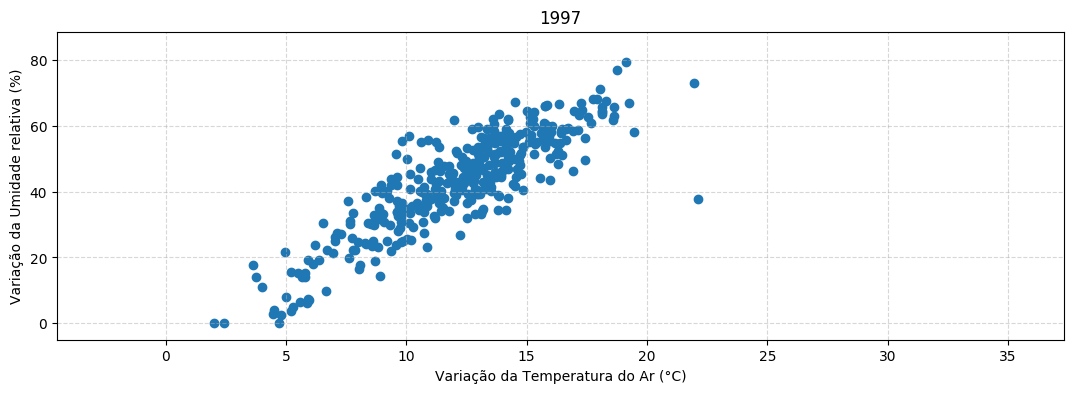

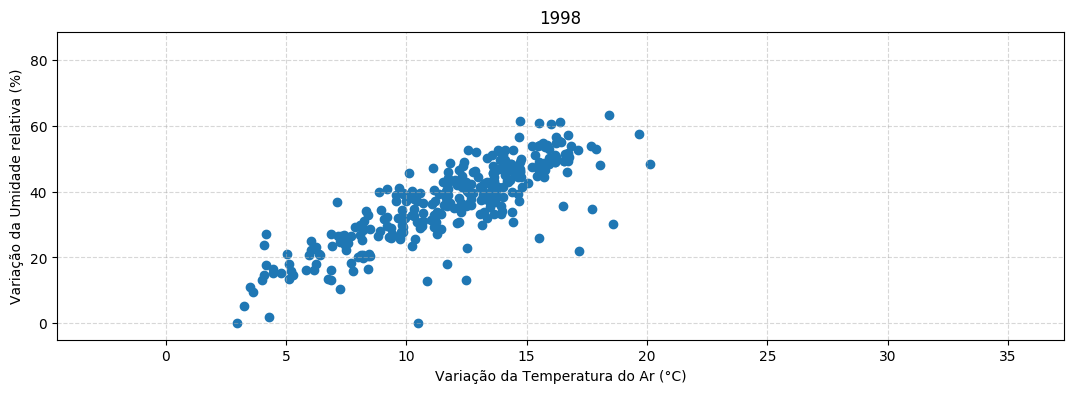

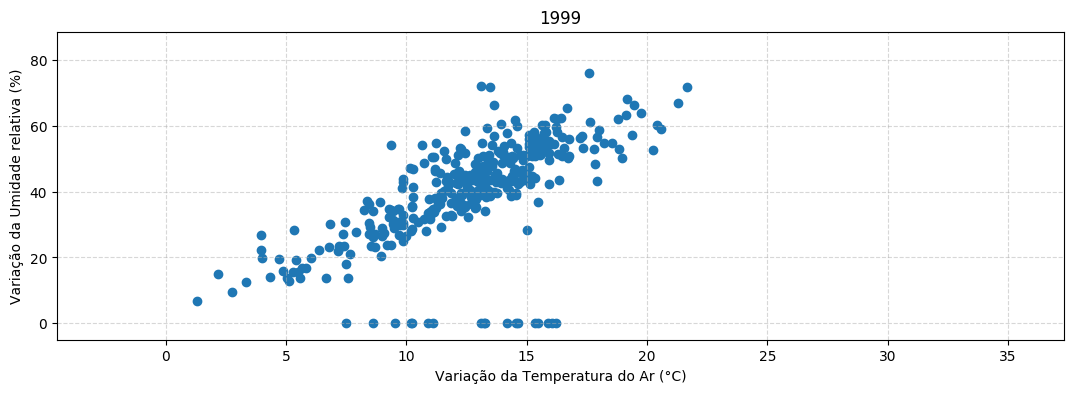

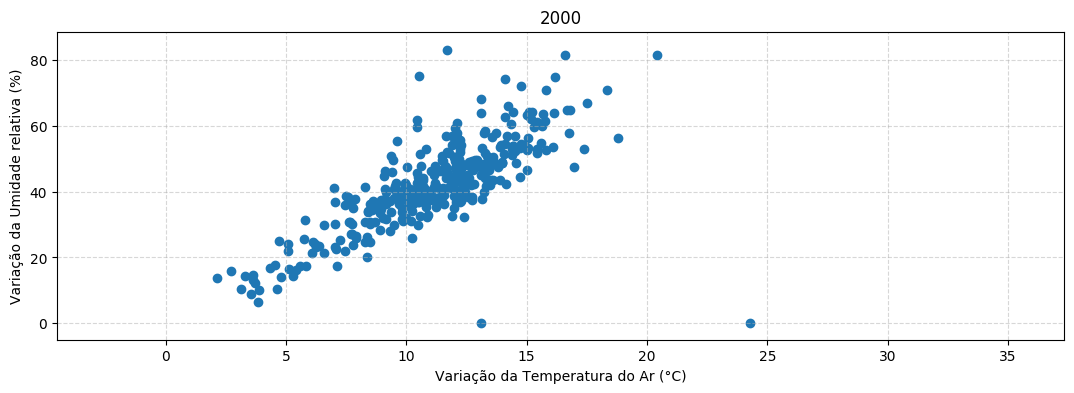

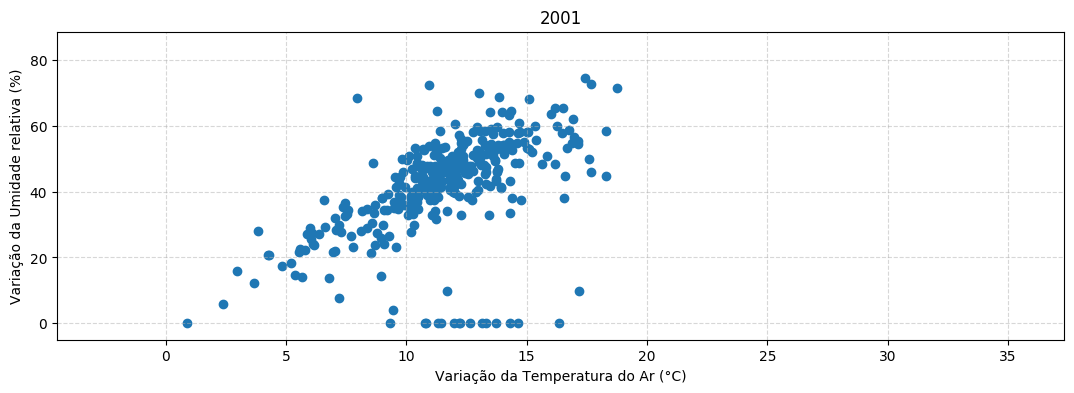

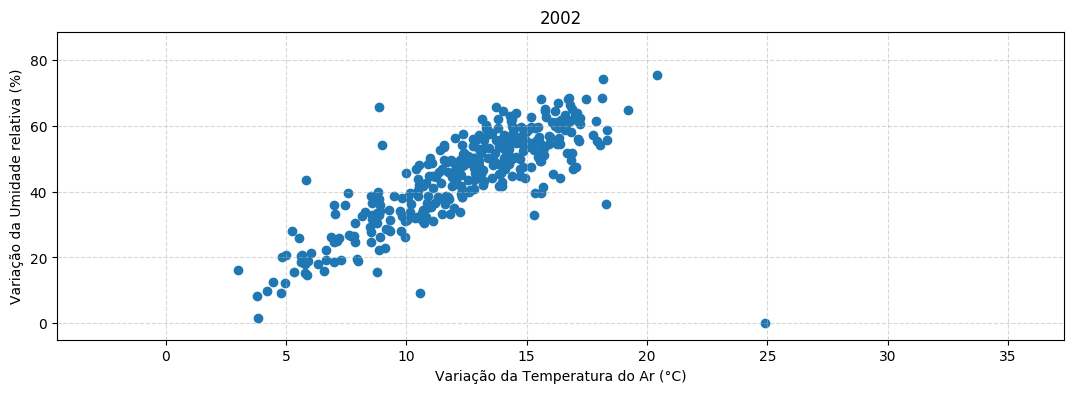

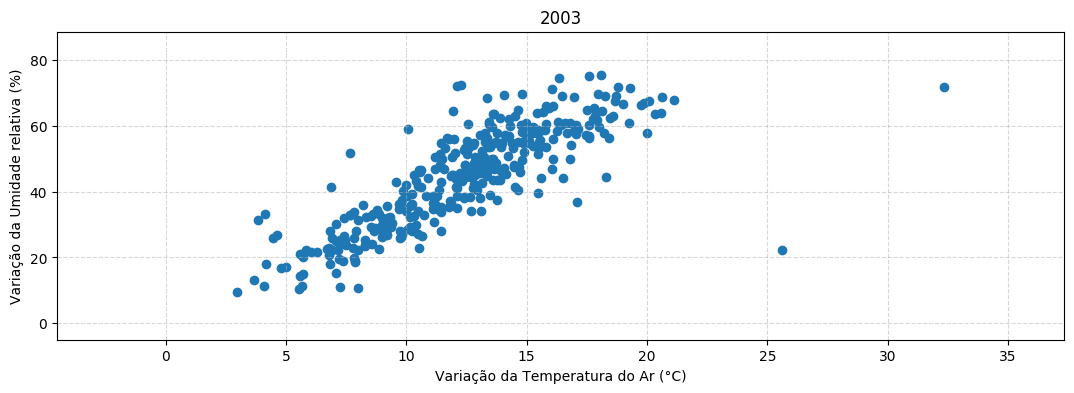

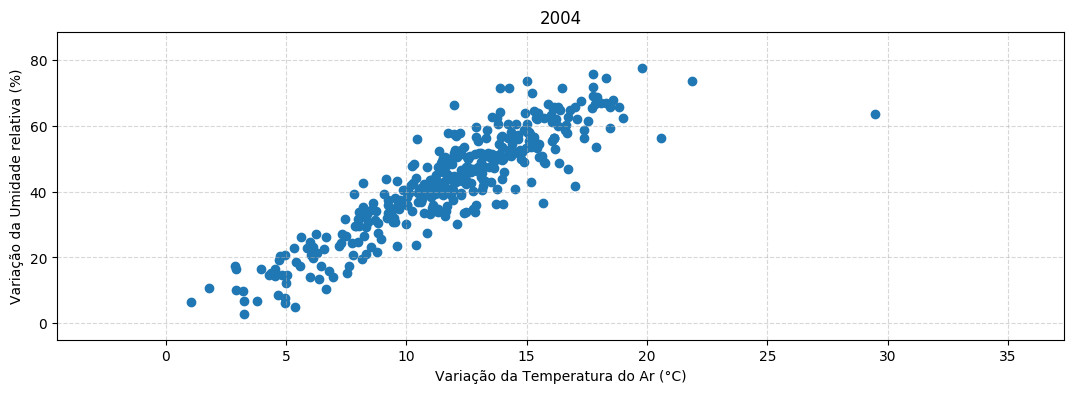

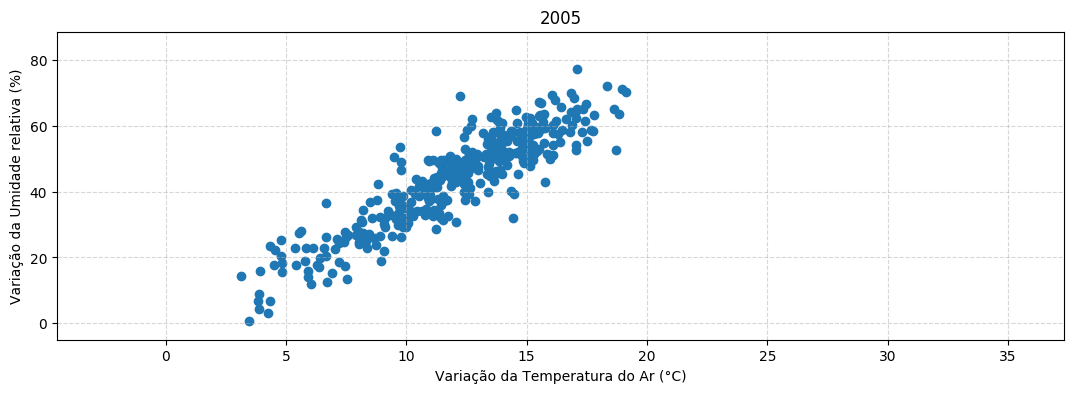

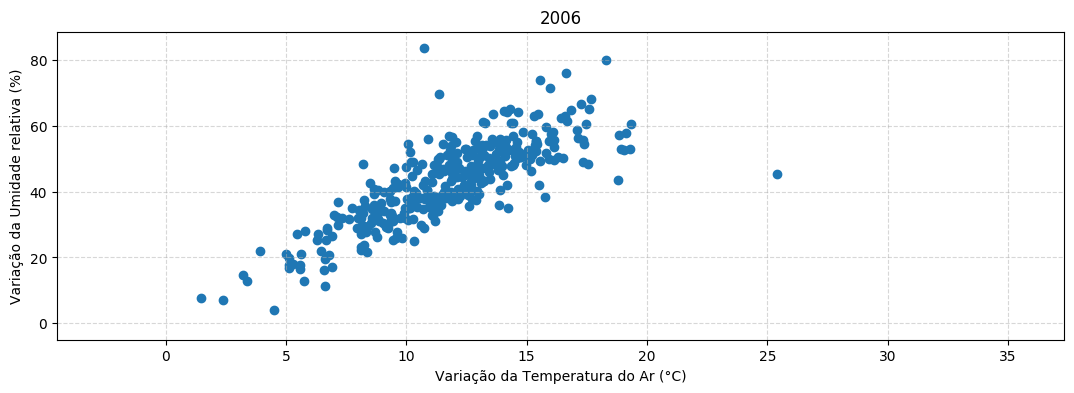

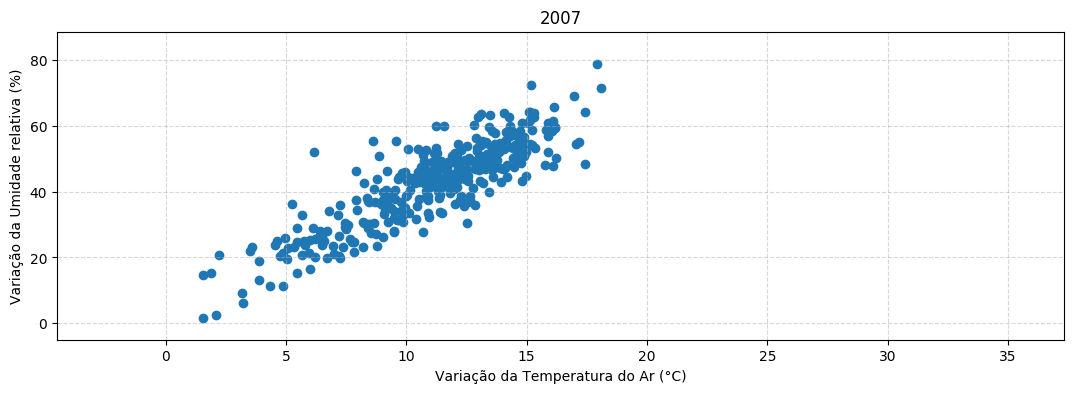

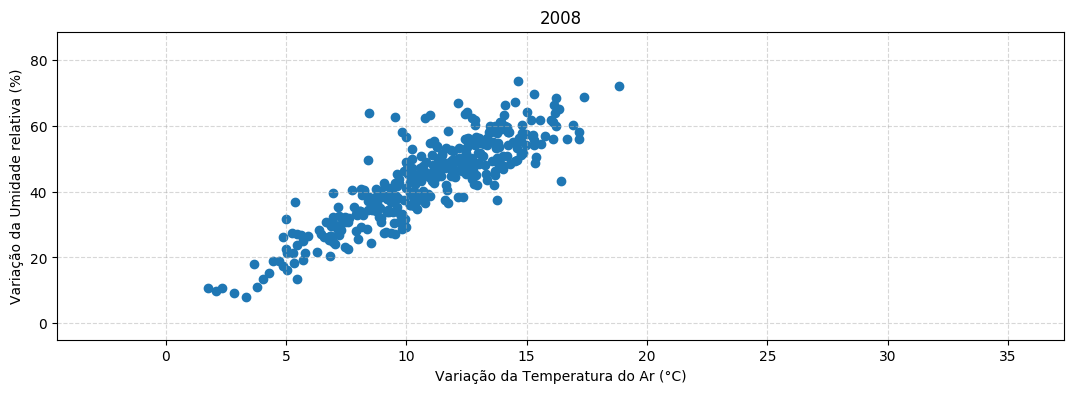

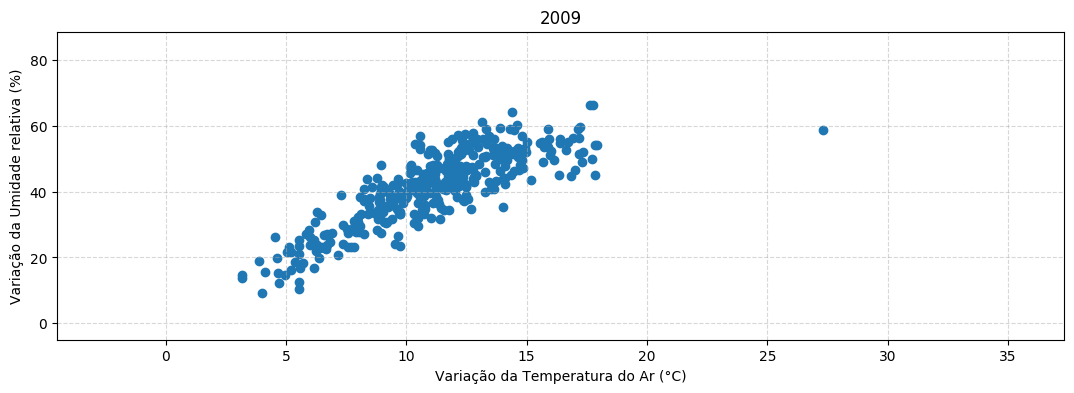

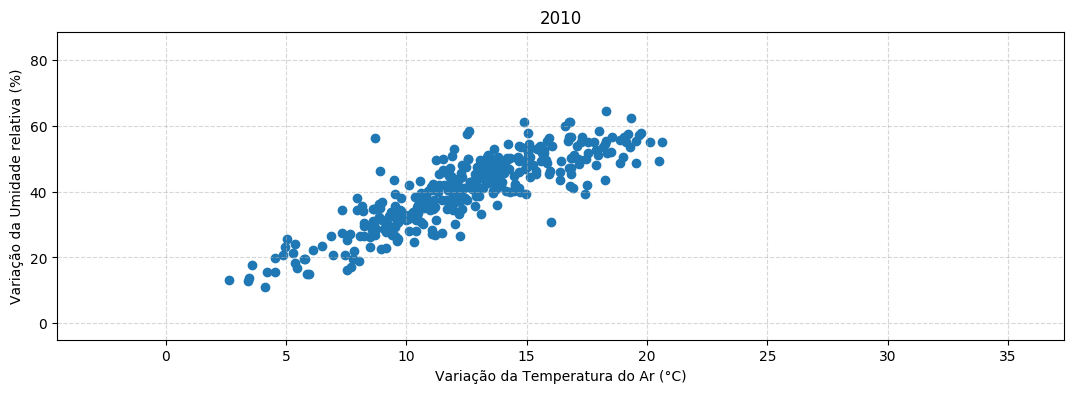

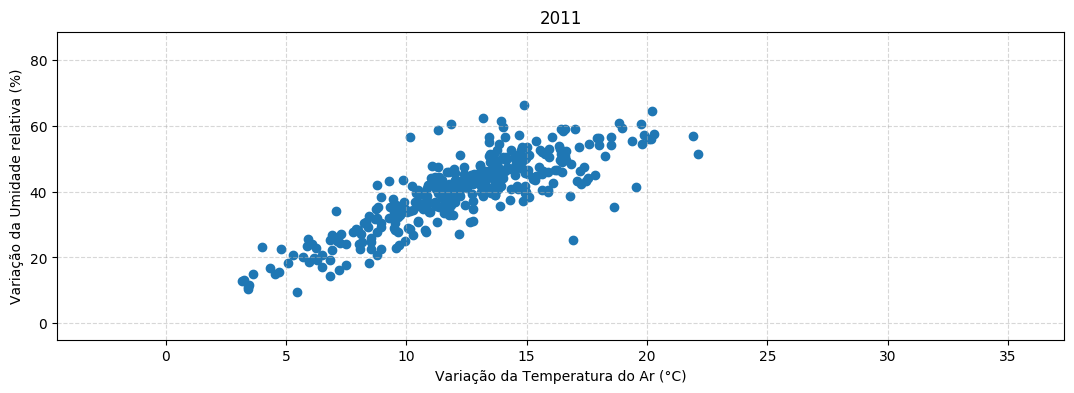

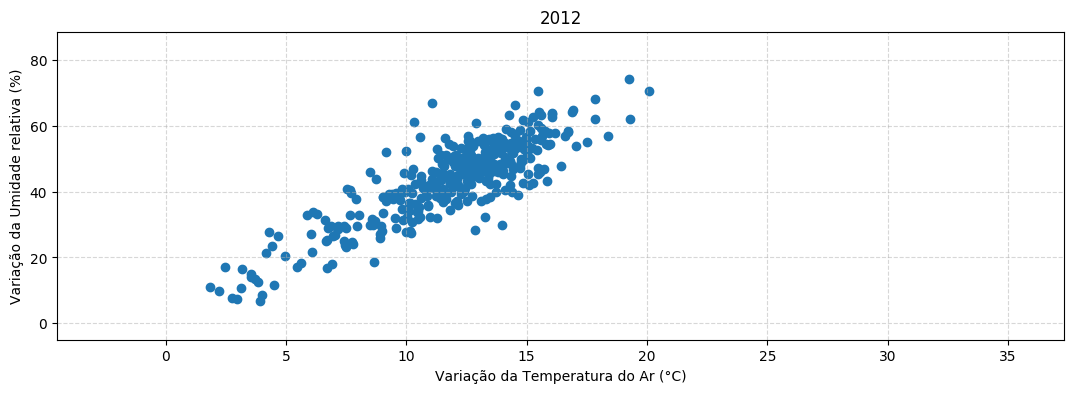

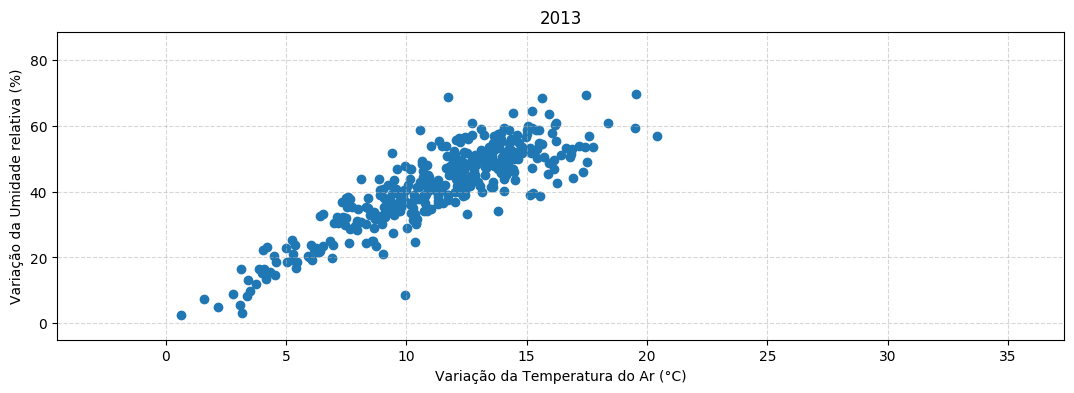

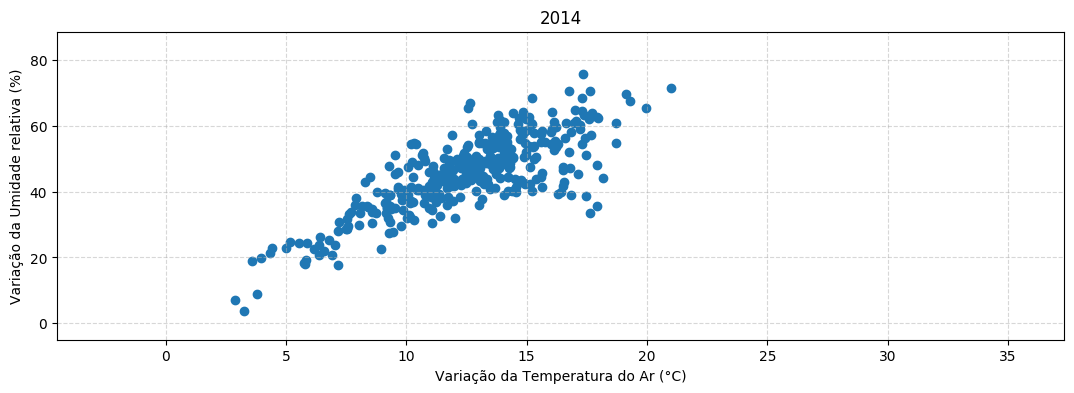

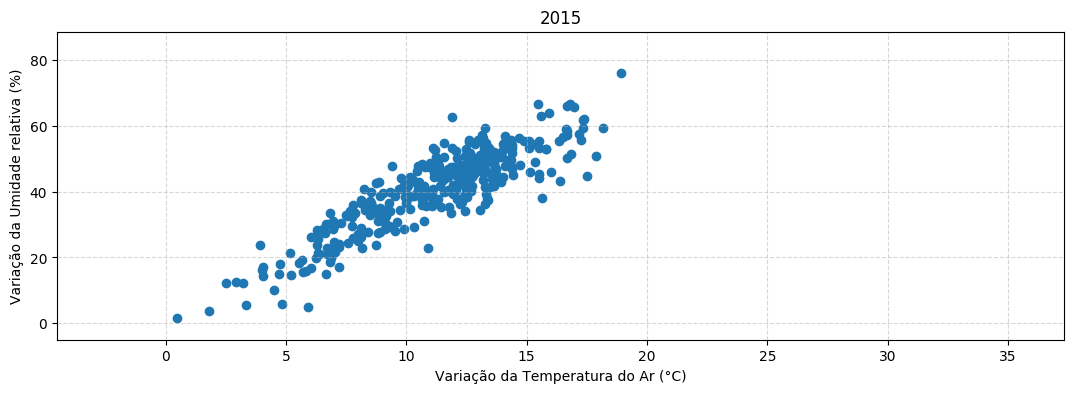

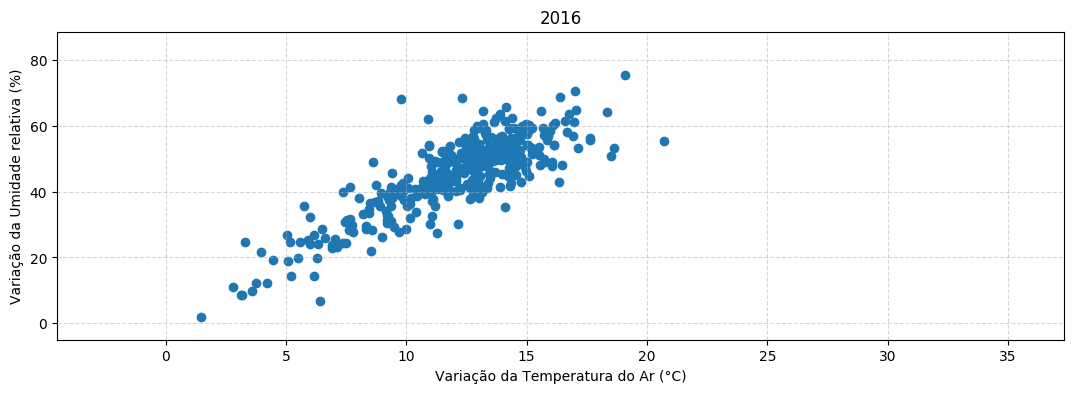

In [18]:
min_x_value = daily_analysis_data_frame[columns.VARIATION_TEMP].min() - 5
max_x_value = daily_analysis_data_frame[columns.VARIATION_TEMP].max() + 5

min_y_value = daily_analysis_data_frame[columns.VARIATION_HUMIDITY].min() - 5
max_y_value = daily_analysis_data_frame[columns.VARIATION_HUMIDITY].max() + 5

for i in daily_analysis_data_frame[columns.YEAR].unique():
    data_2plot = daily_analysis_data_frame[(daily_analysis_data_frame[columns.YEAR] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.scatter(data_2plot[columns.VARIATION_TEMP], data_2plot[columns.VARIATION_HUMIDITY])
    plt.xlabel(columns.VARIATION_TEMP)
    plt.ylabel(columns.VARIATION_HUMIDITY)
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

In [19]:
daily_analysis_data_frame[[columns.VARIATION_TEMP,columns.VARIATION_HUMIDITY]].corr()


Variação da Temperatura do Ar (°C)  \
Variação da Temperatura do Ar (°C)                            1.000000   
Variação da Umidade relativa (%)                              0.797725   

                                    Variação da Umidade relativa (%)  
Variação da Temperatura do Ar (°C)                          0.797725  
Variação da Umidade relativa (%)                            1.000000

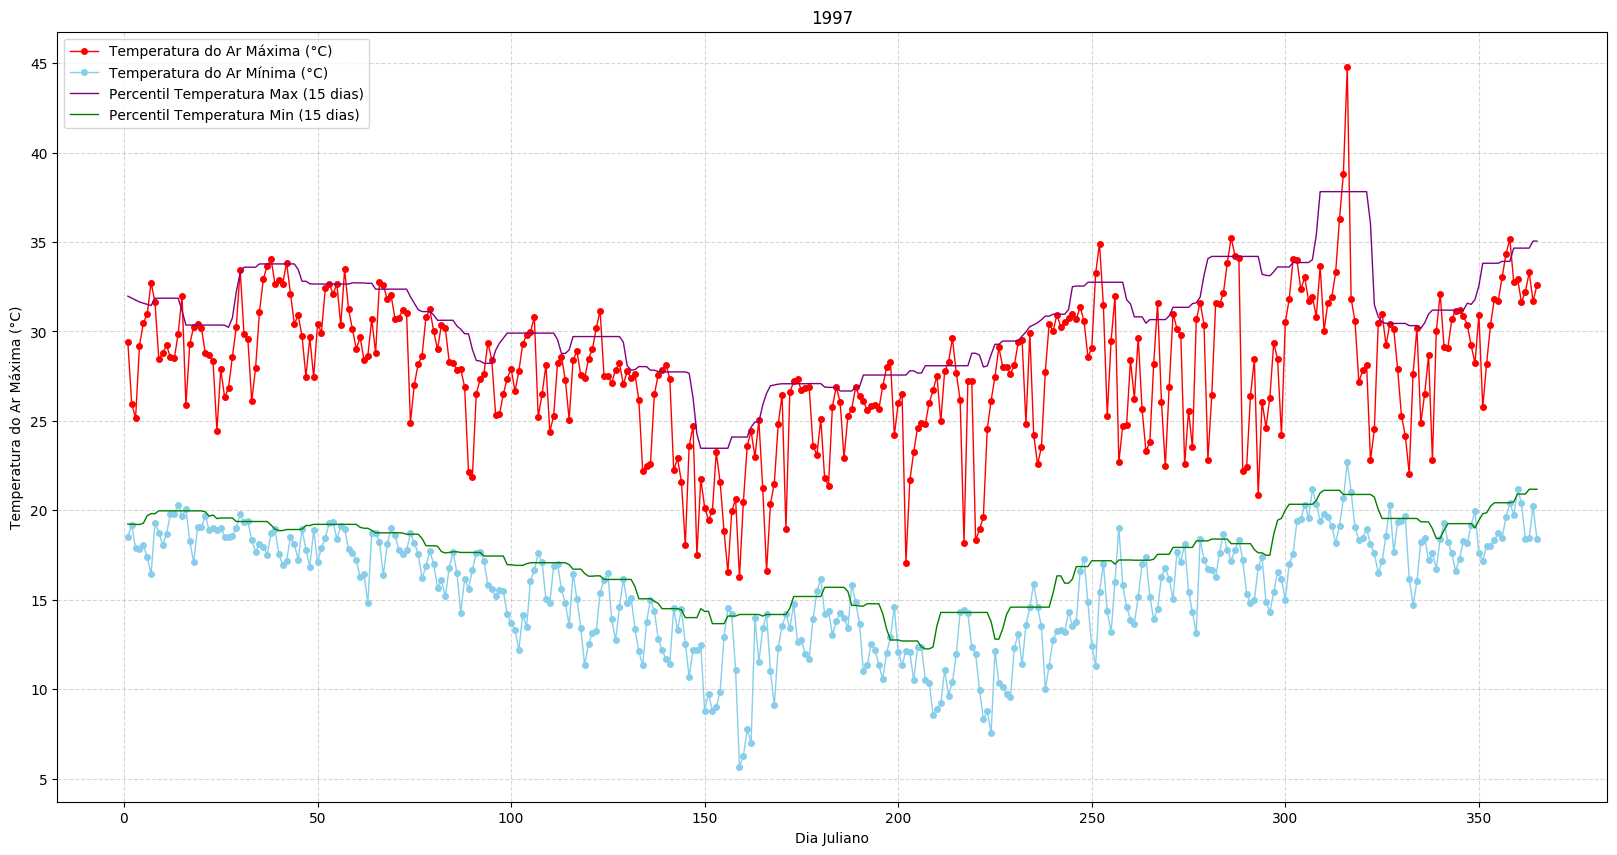

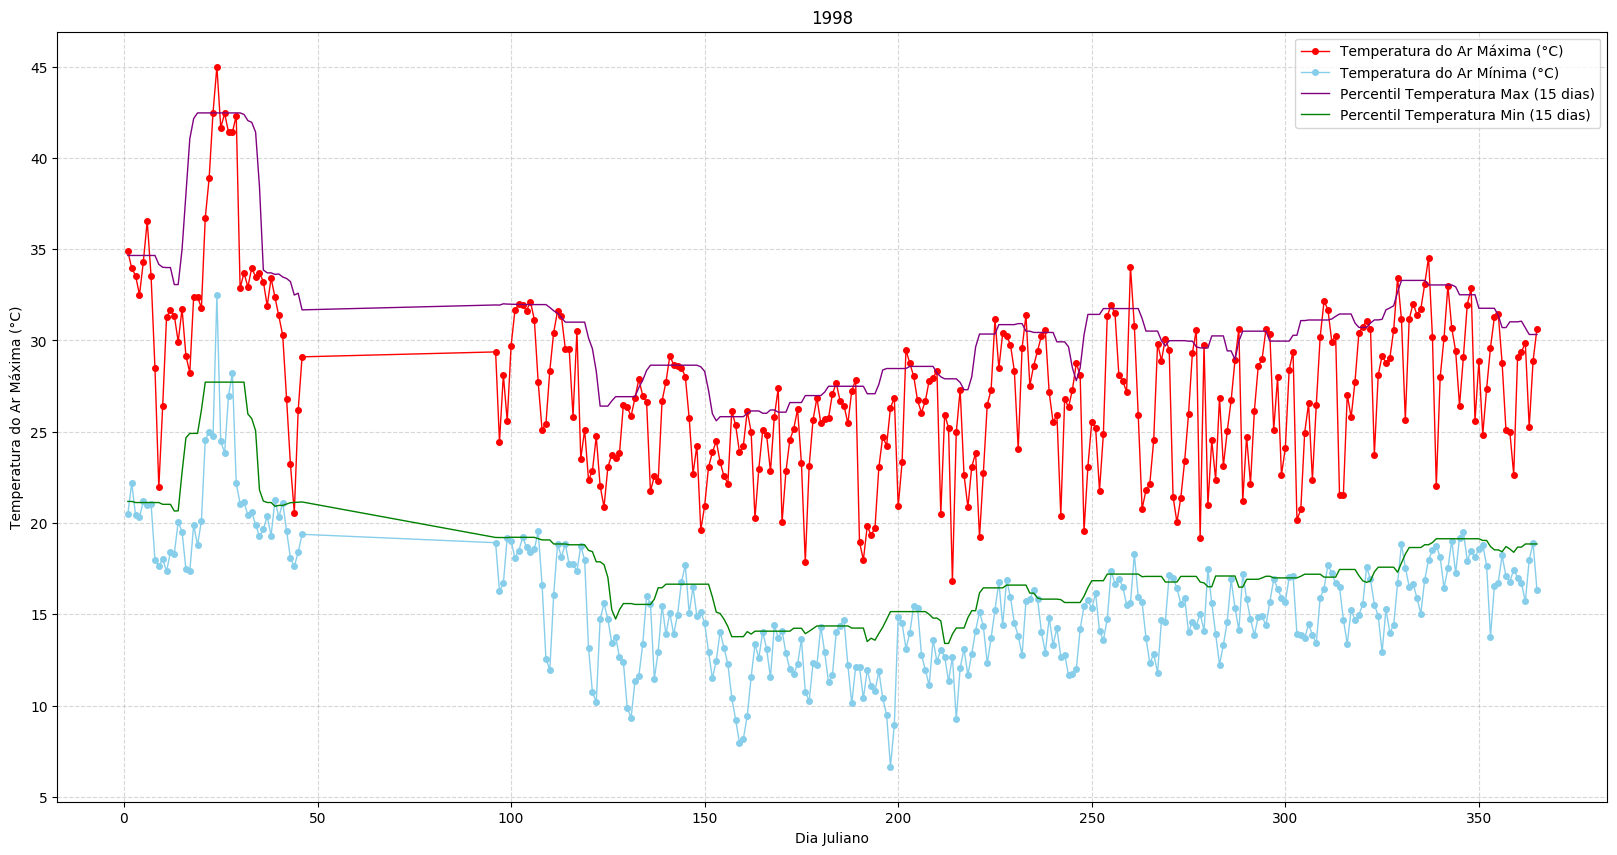

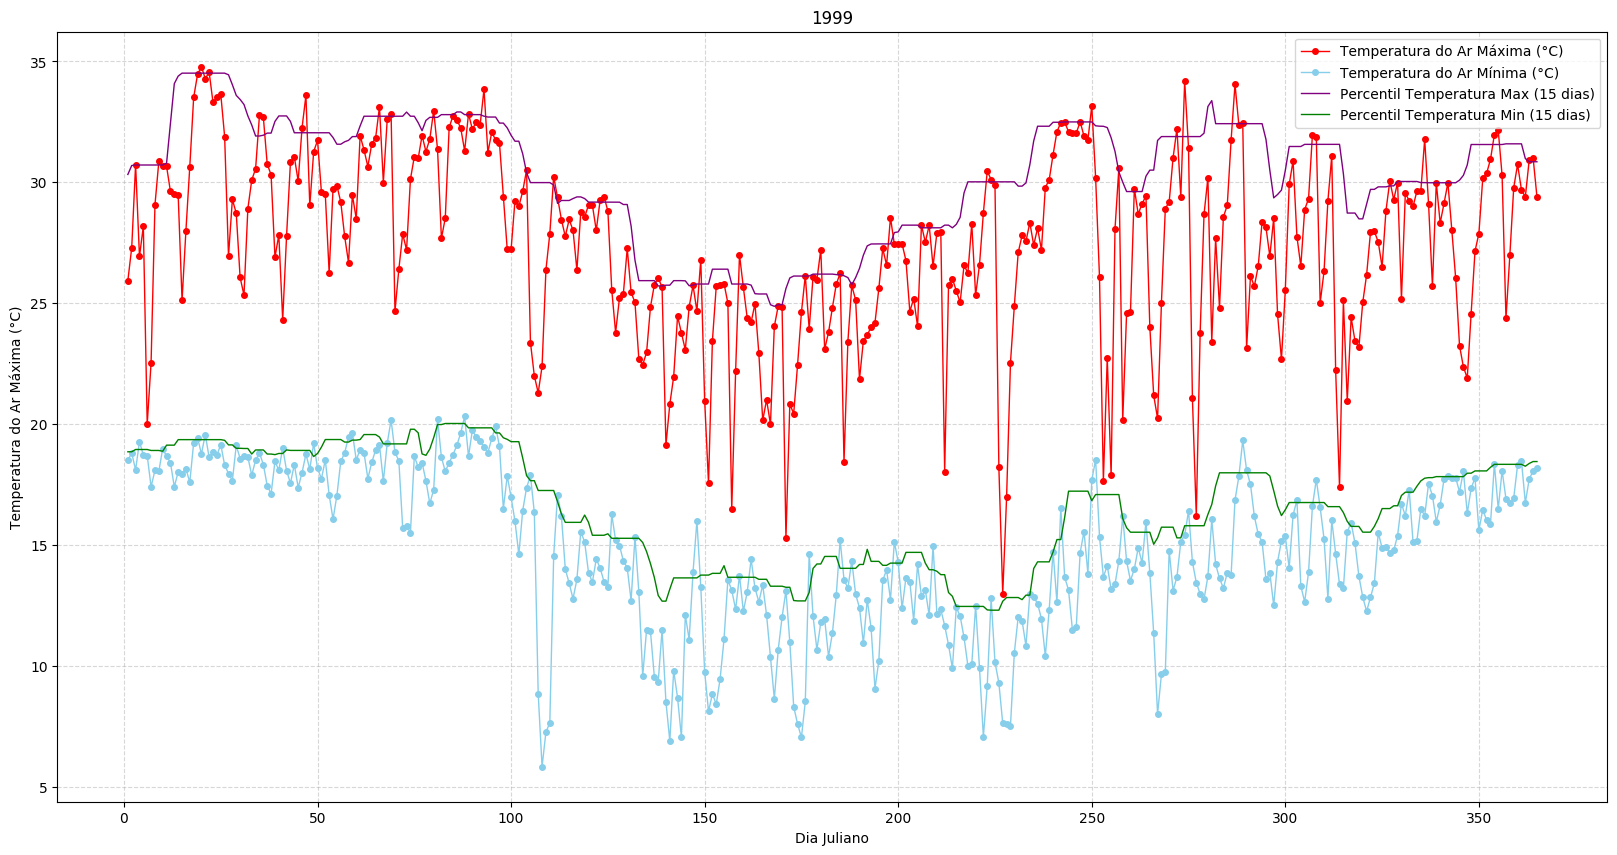

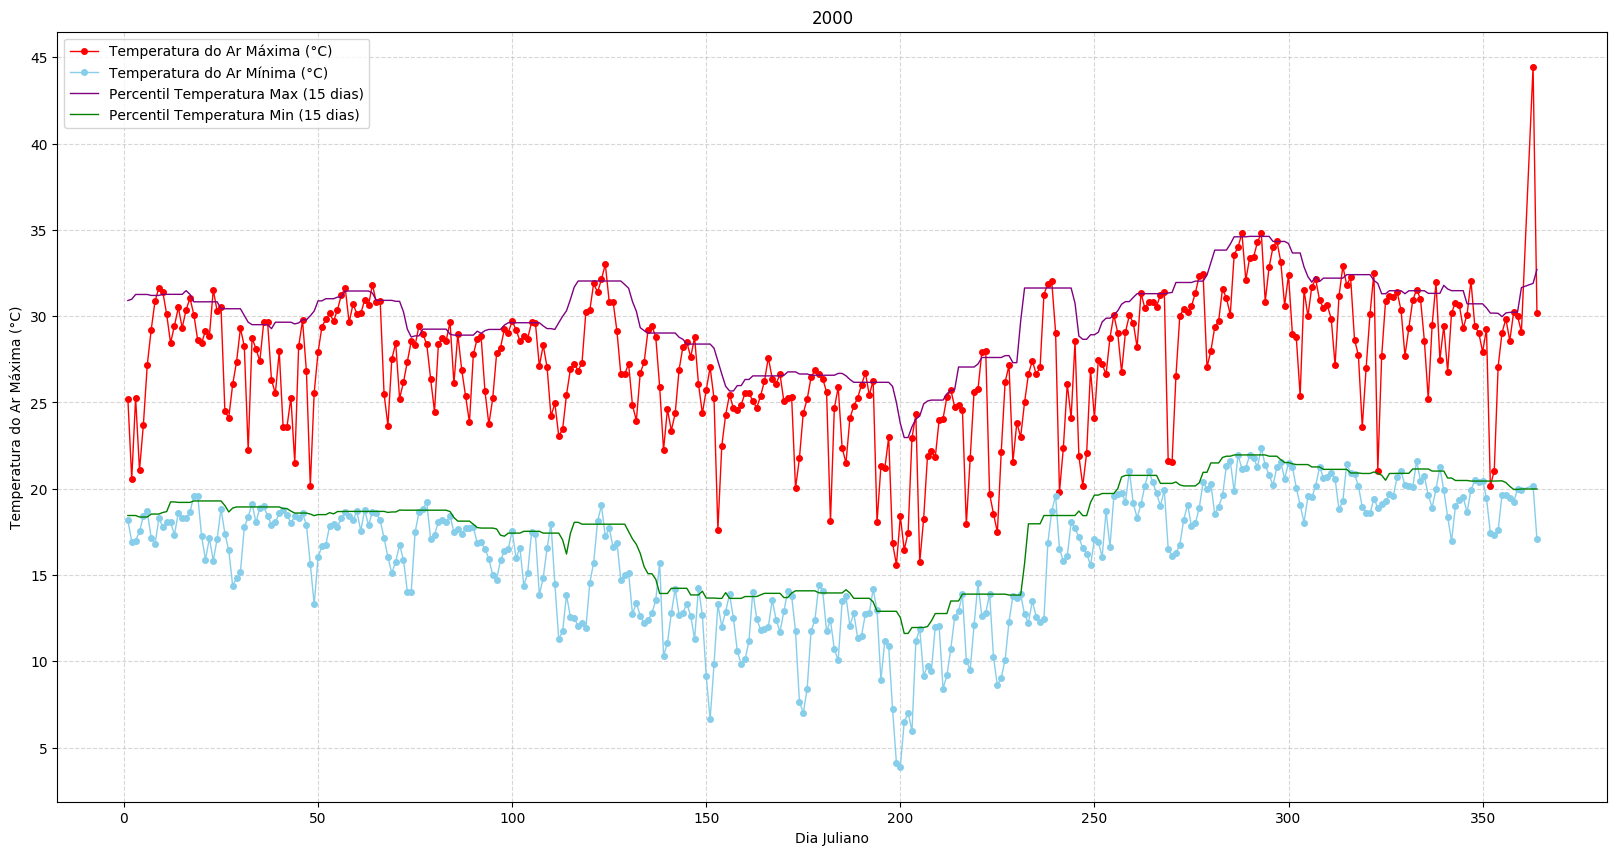

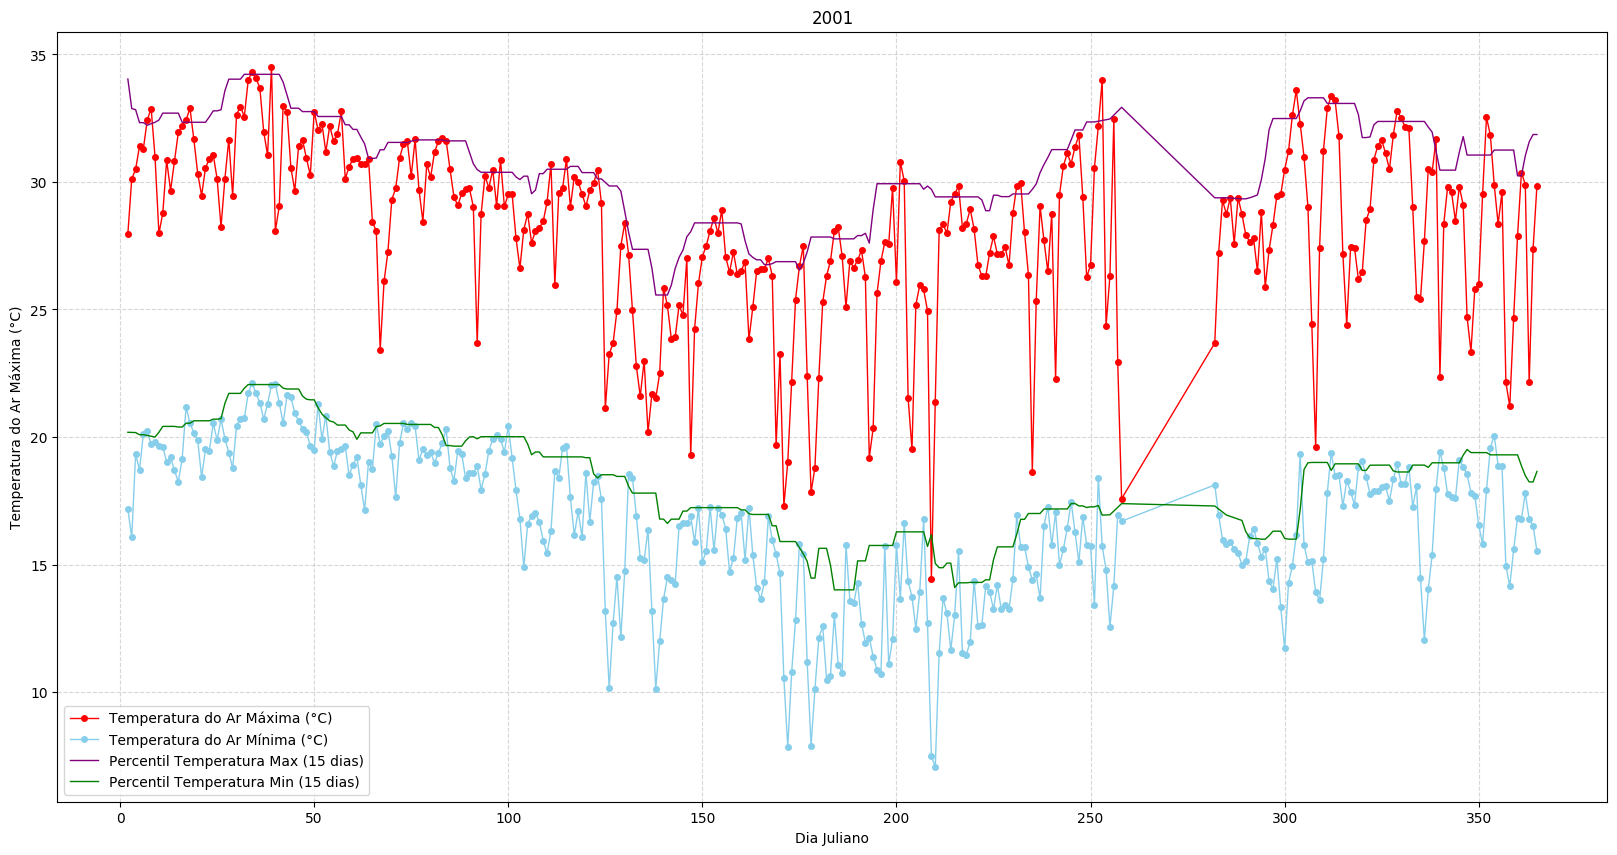

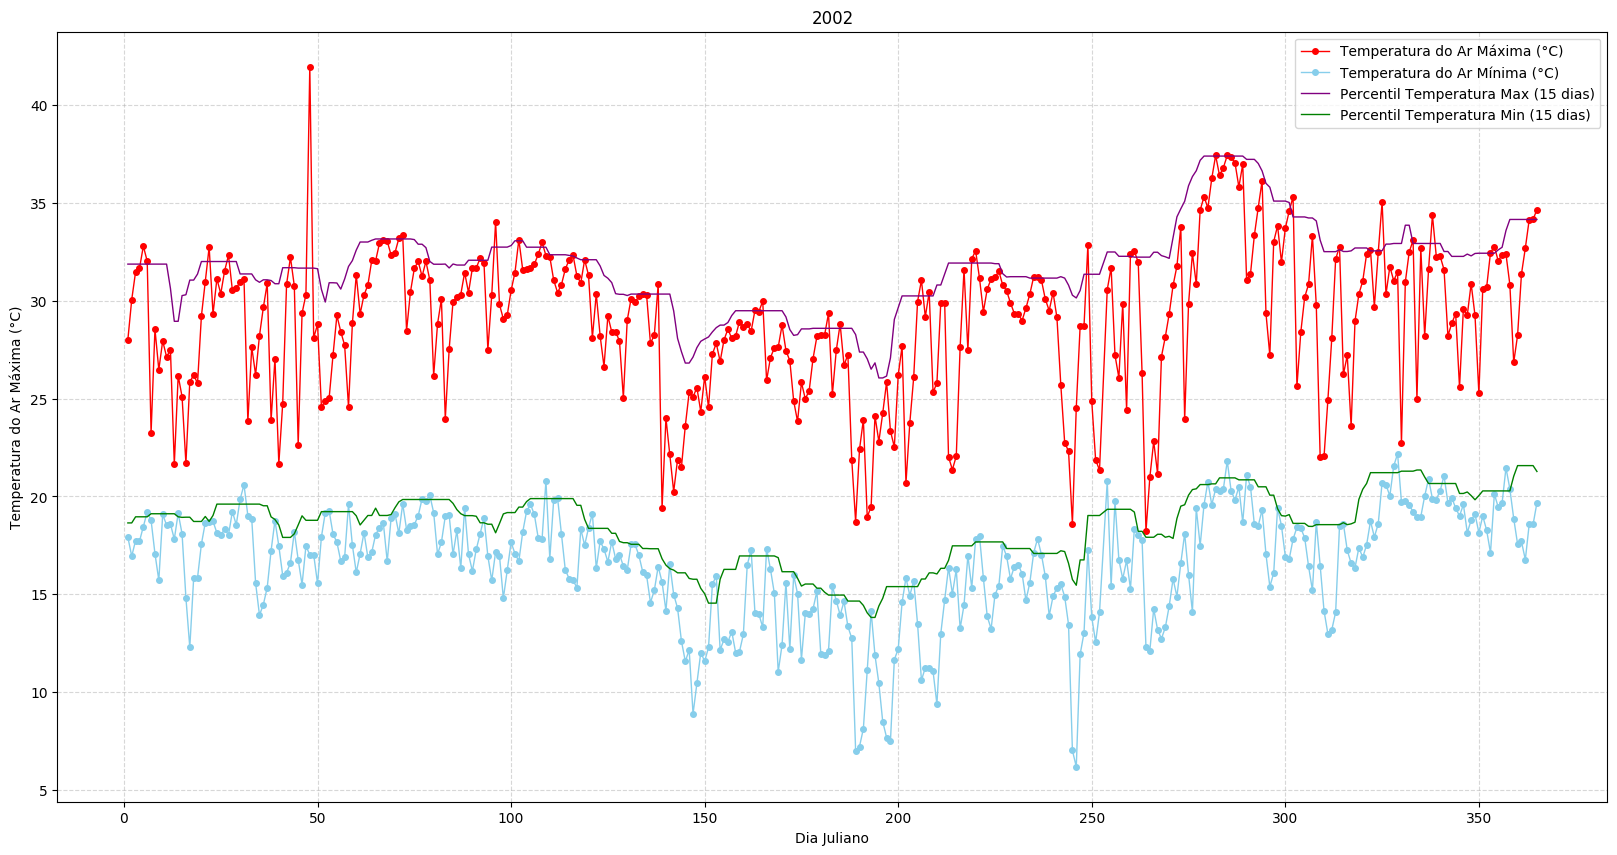

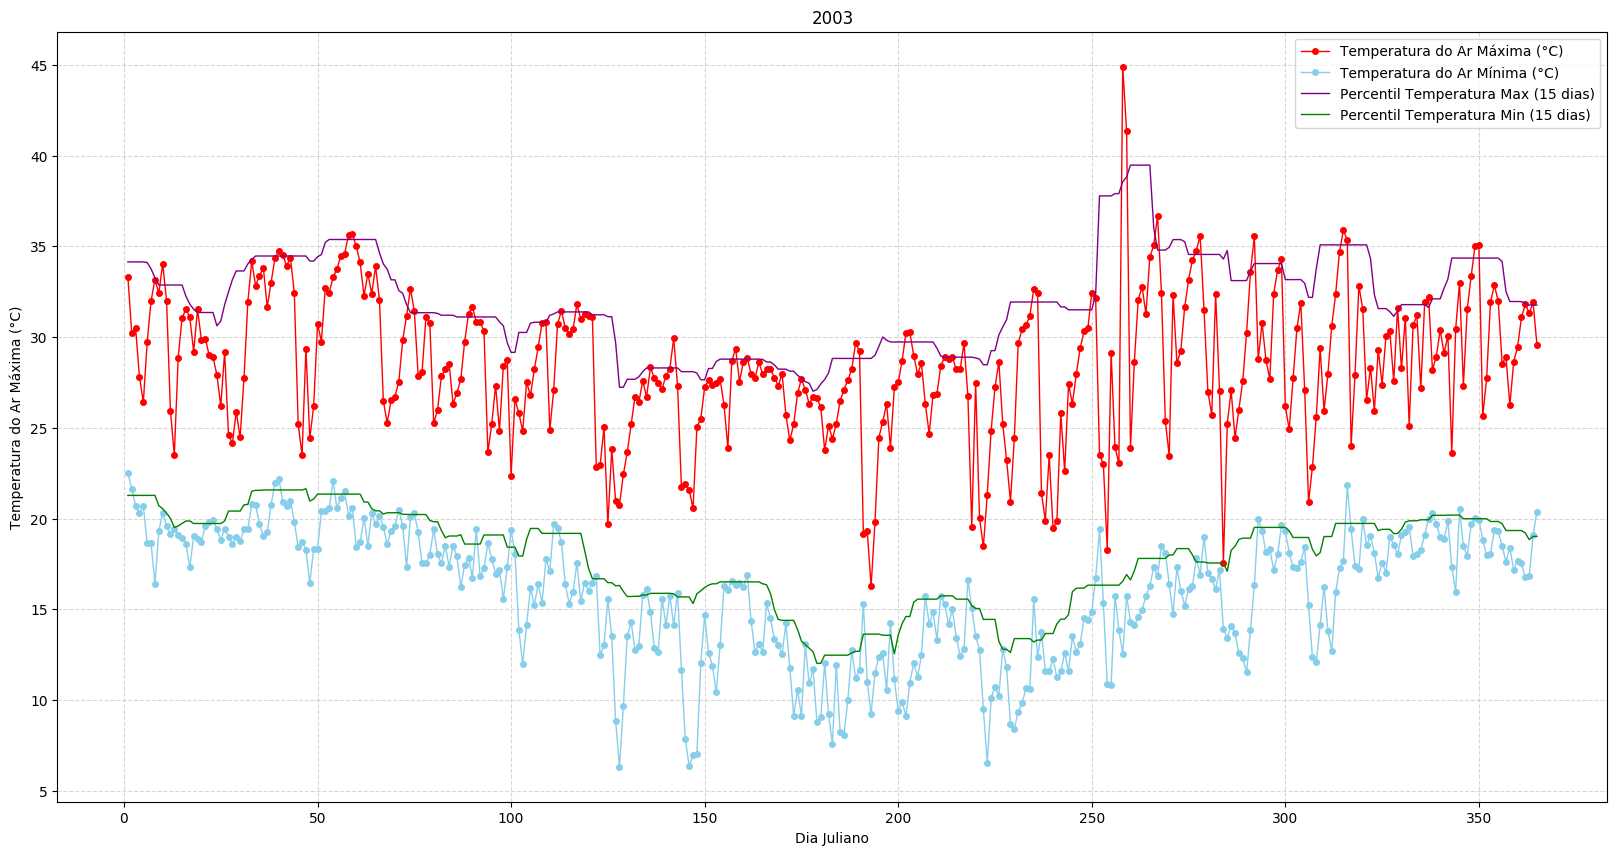

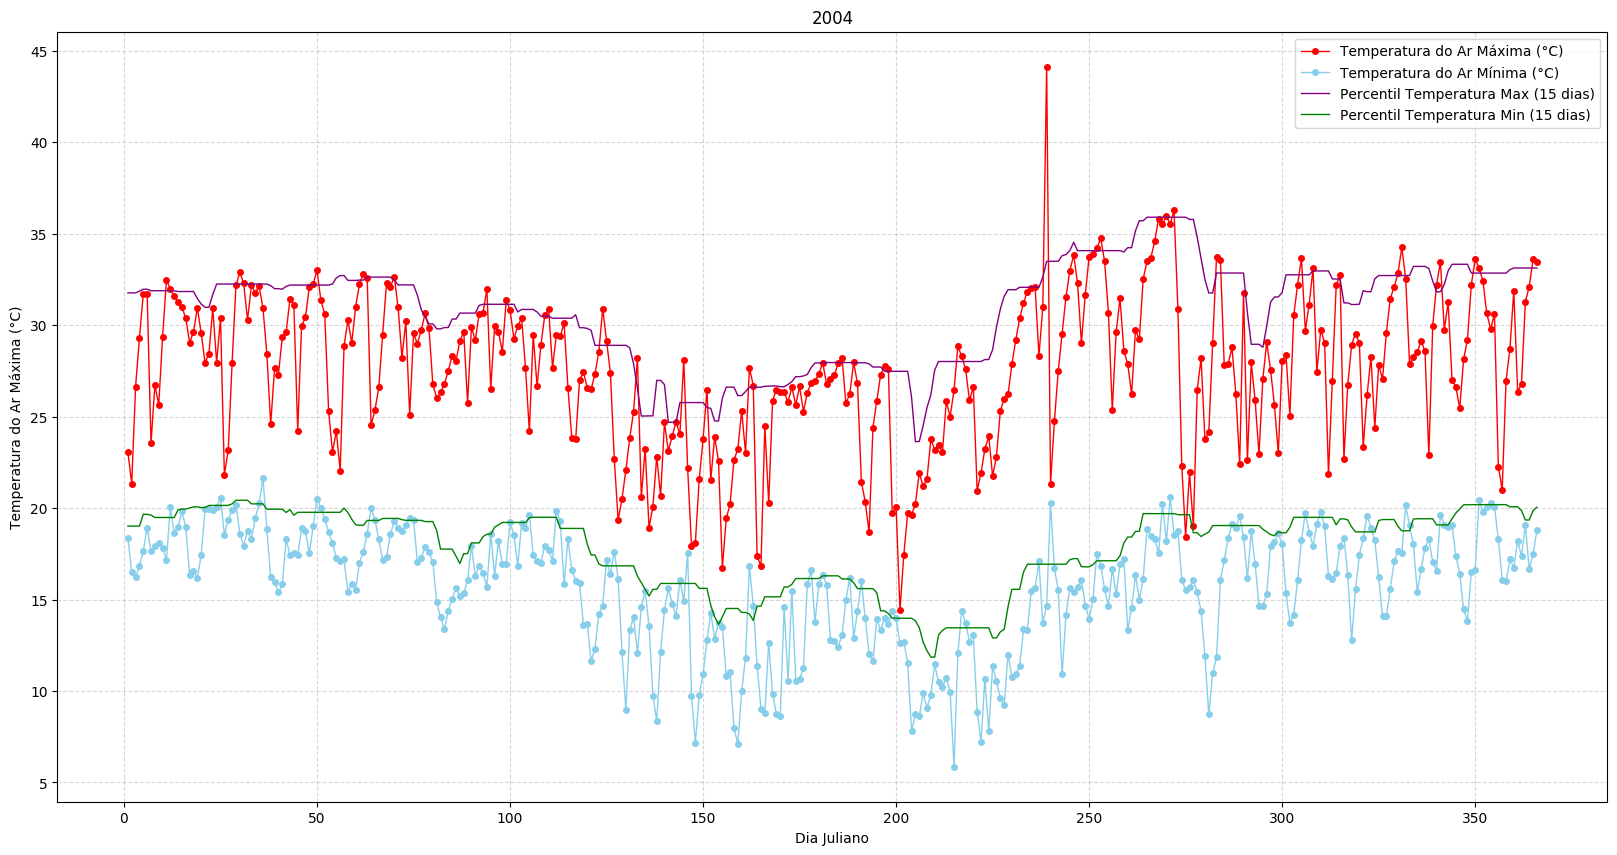

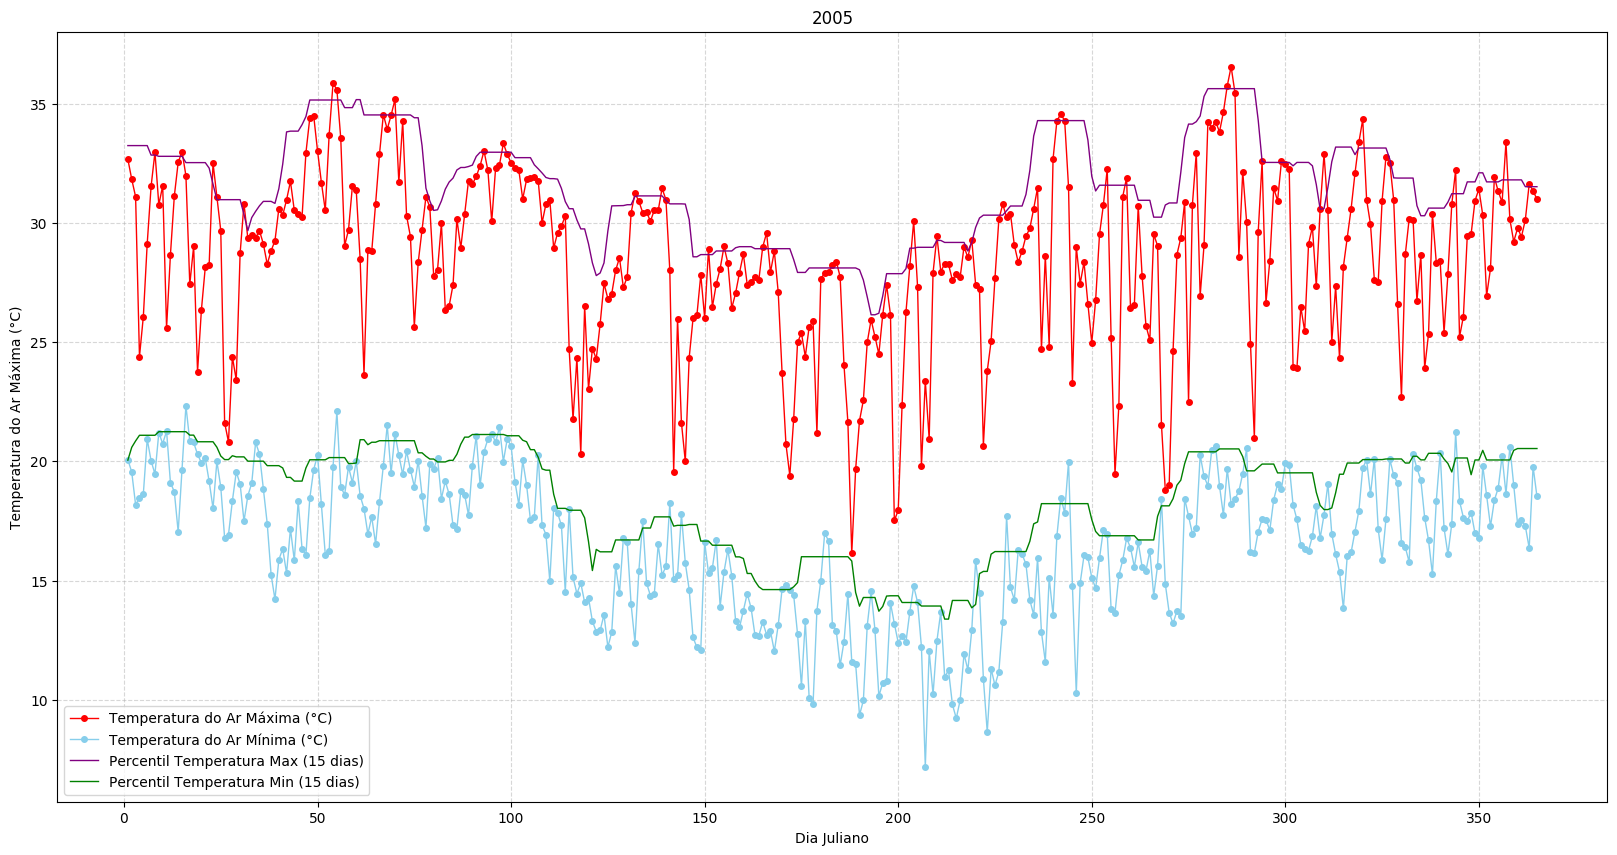

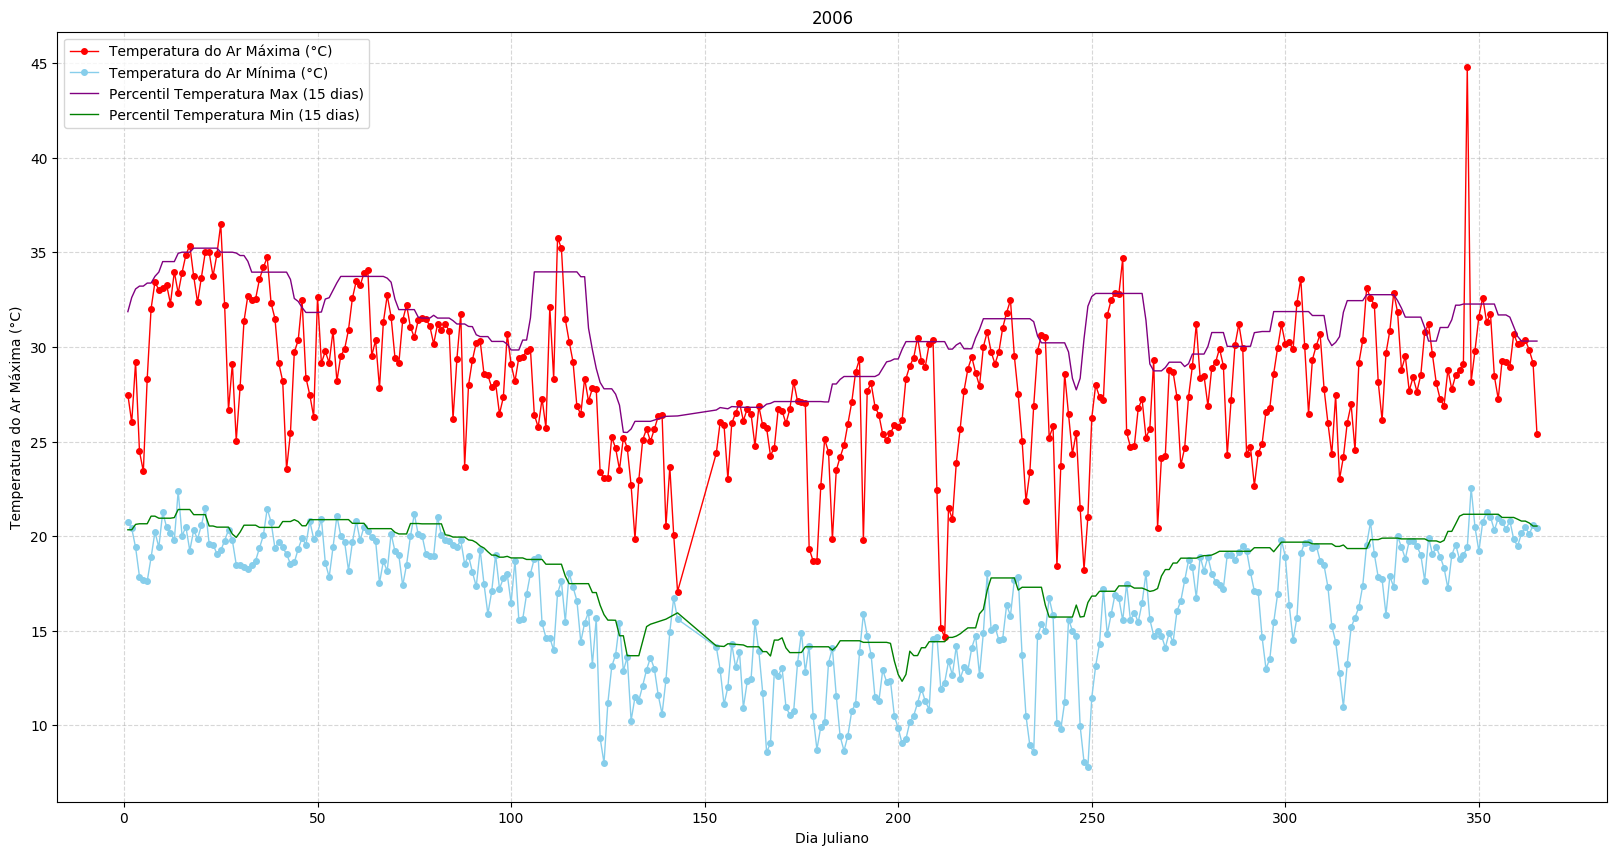

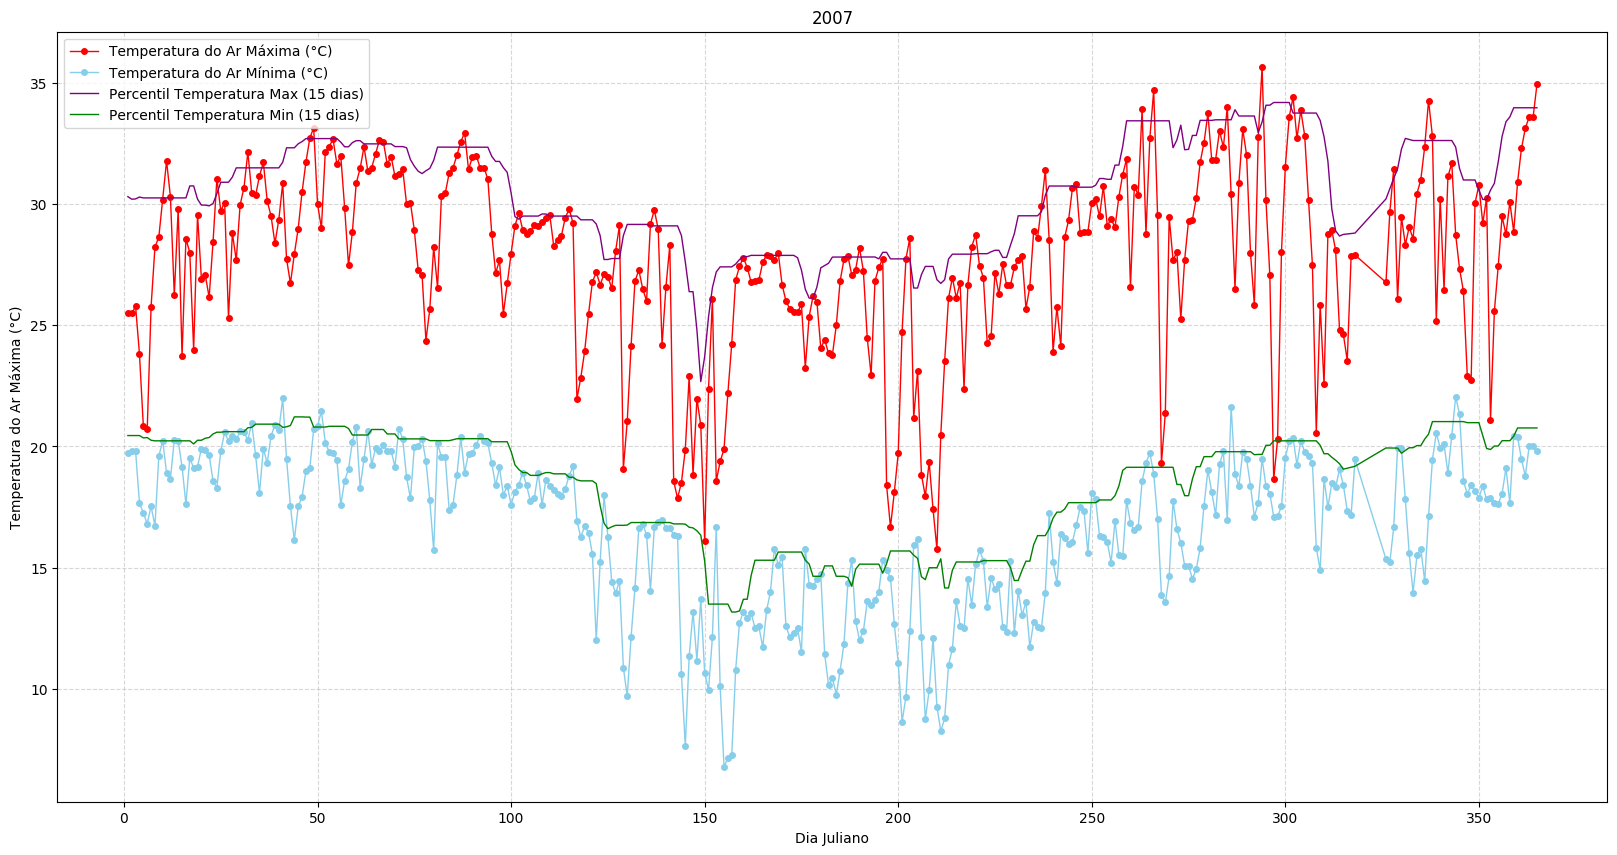

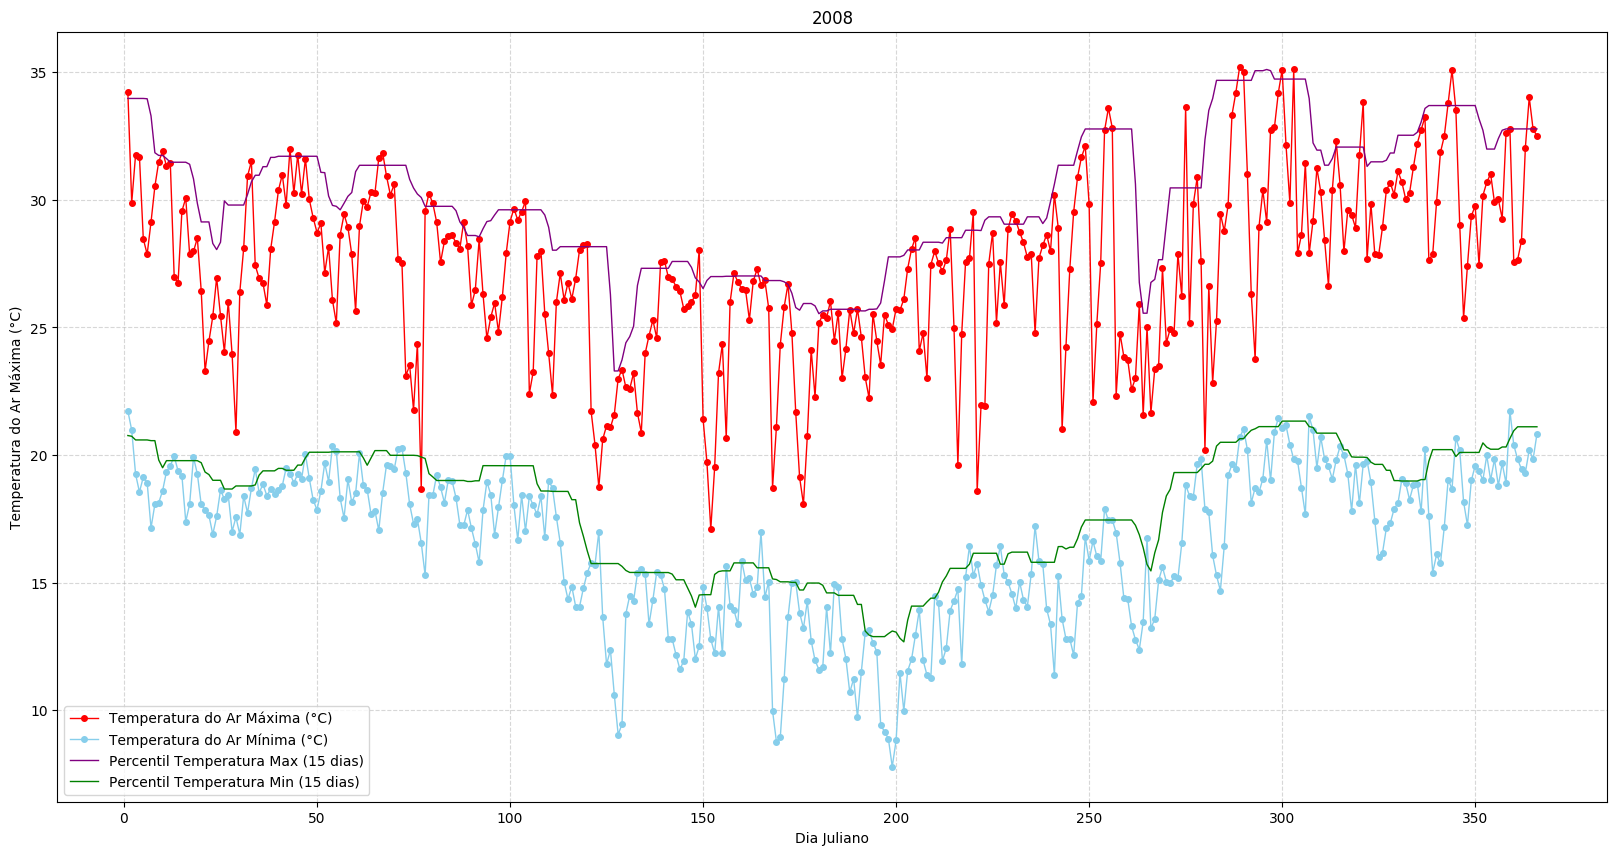

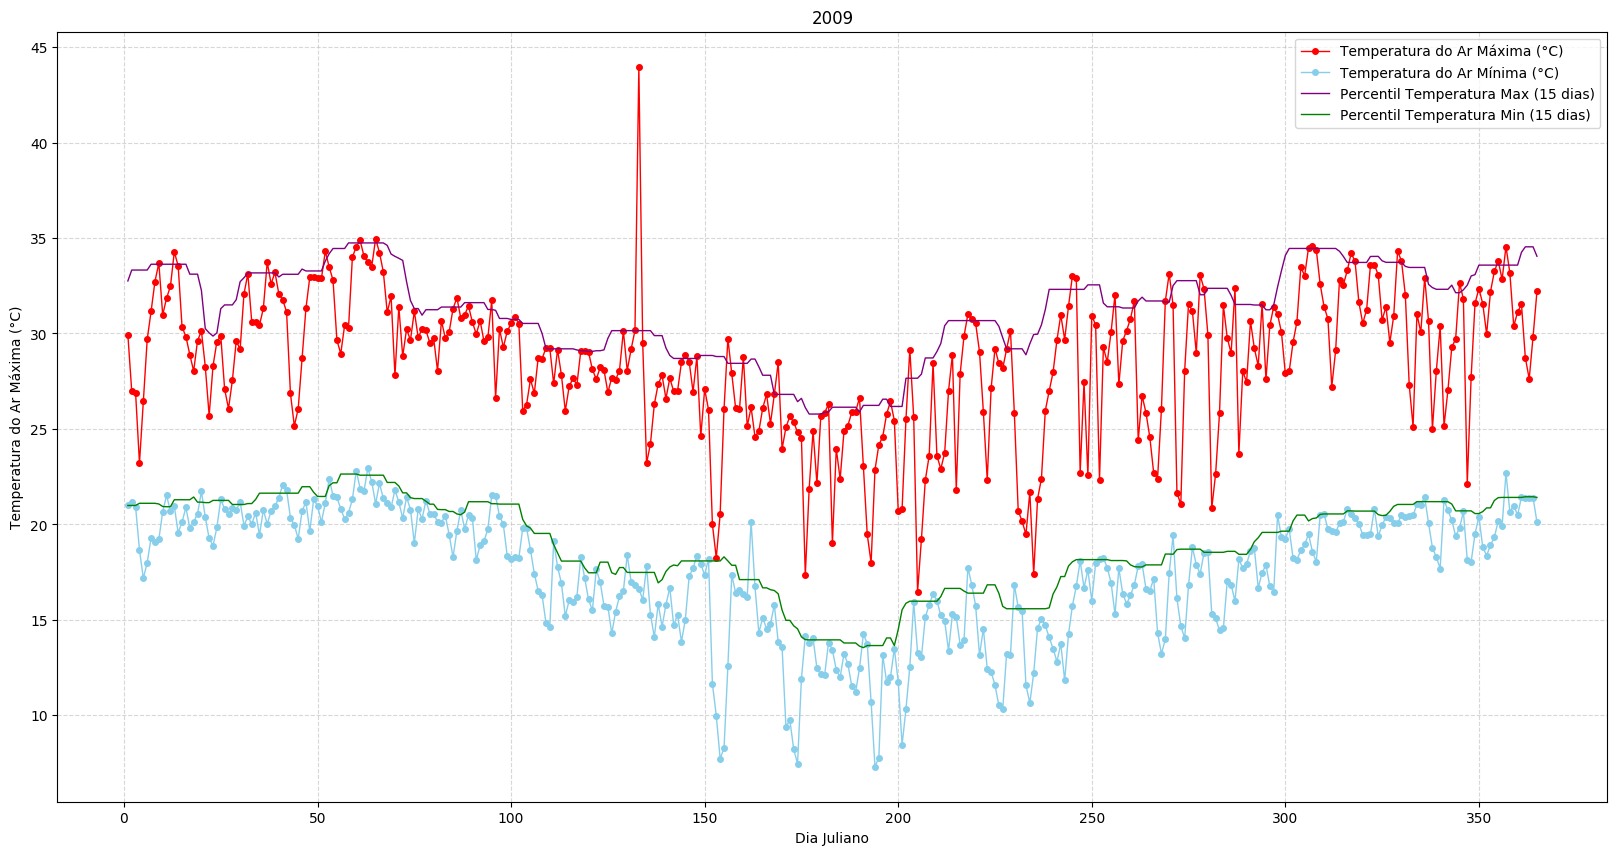

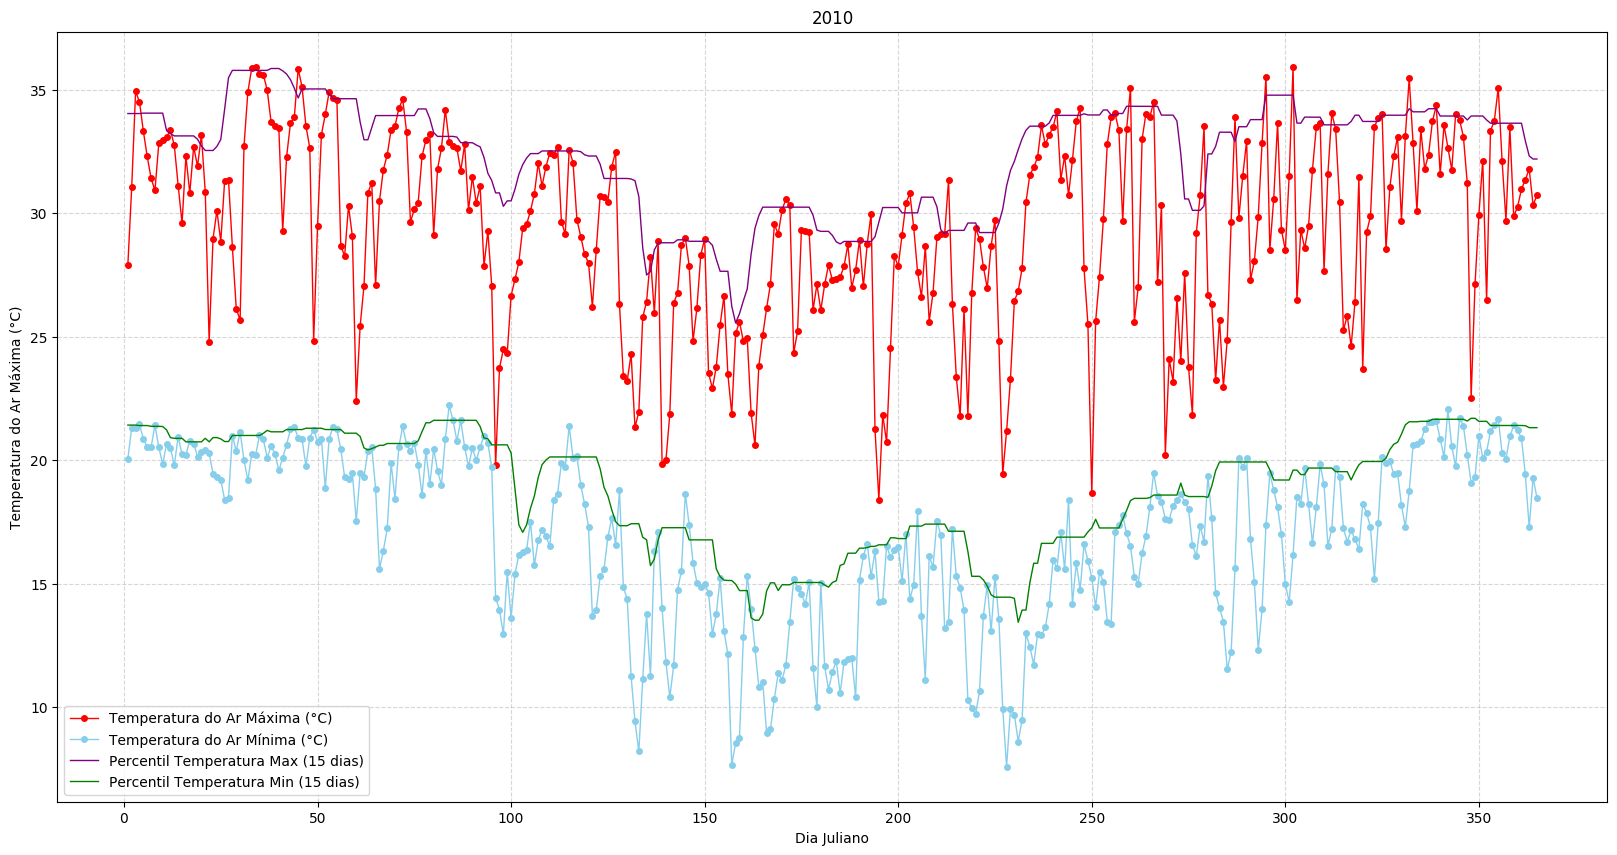

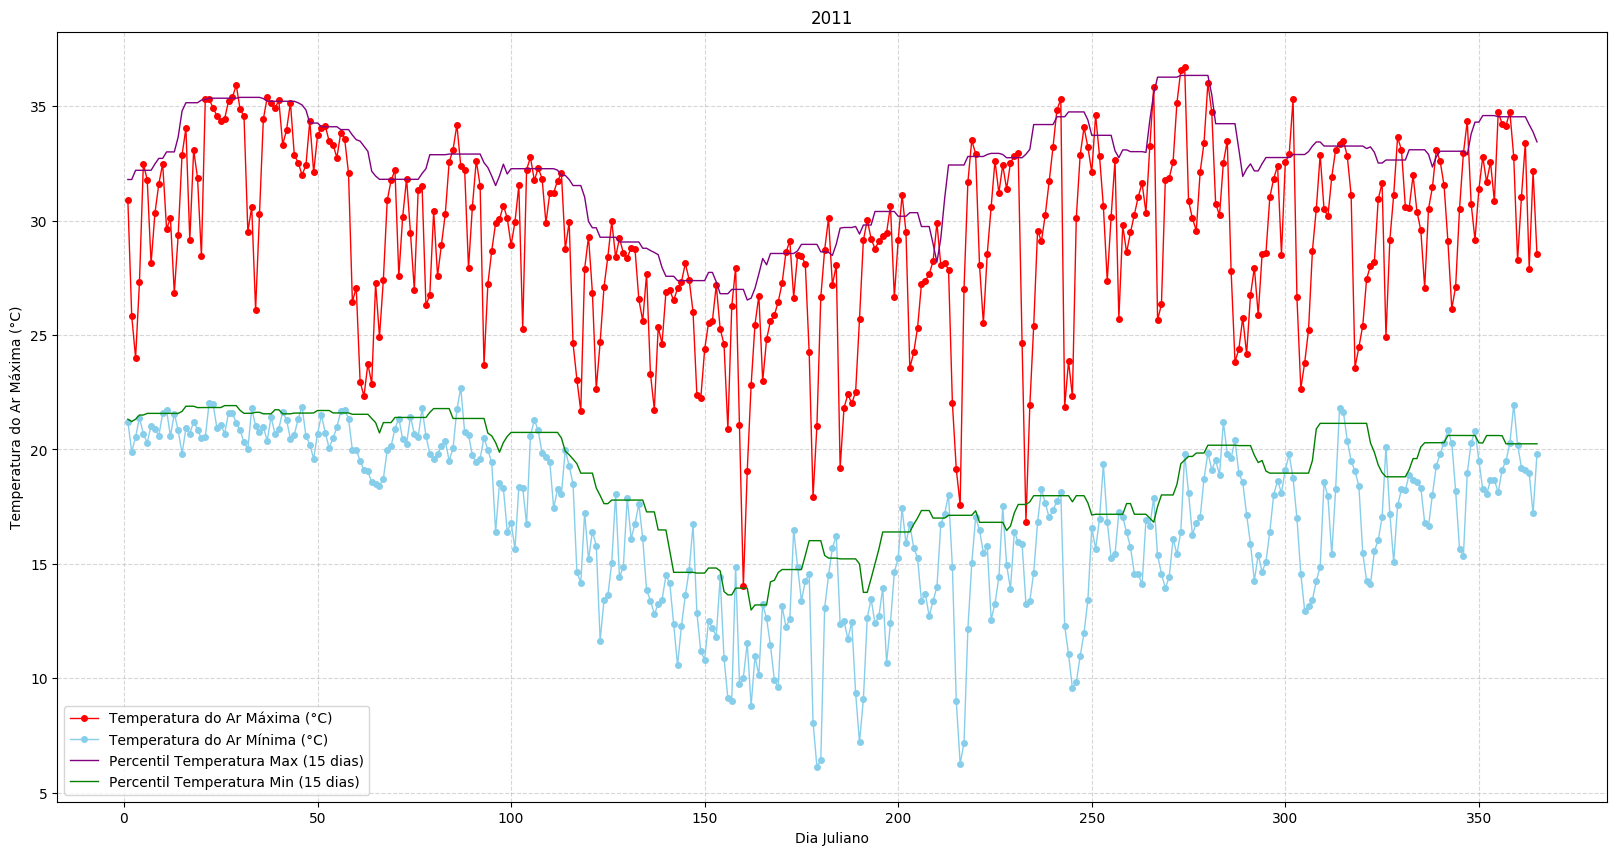

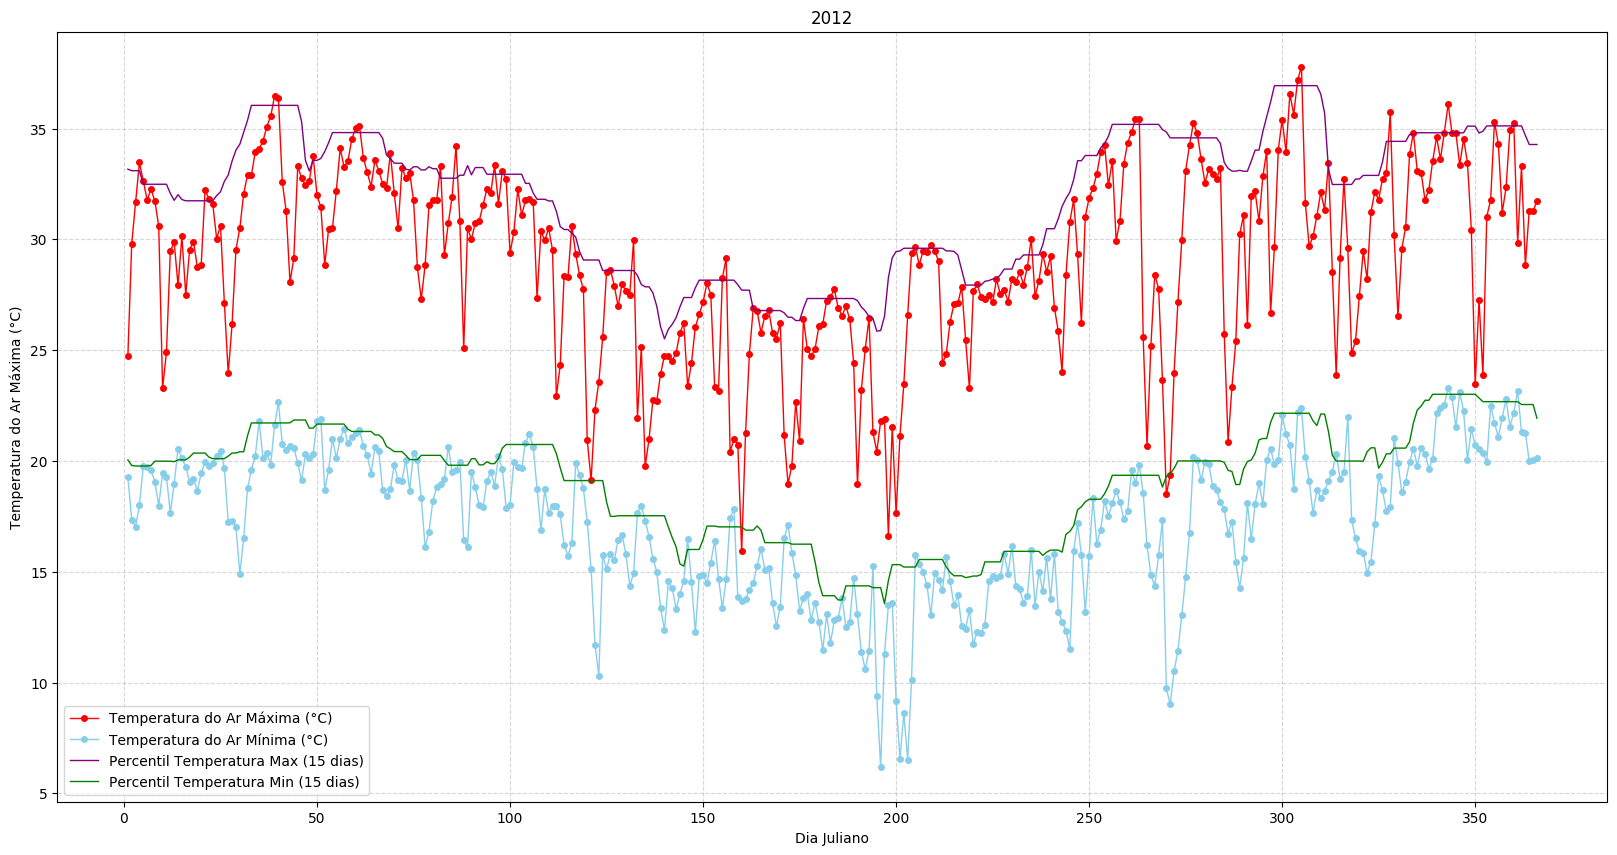

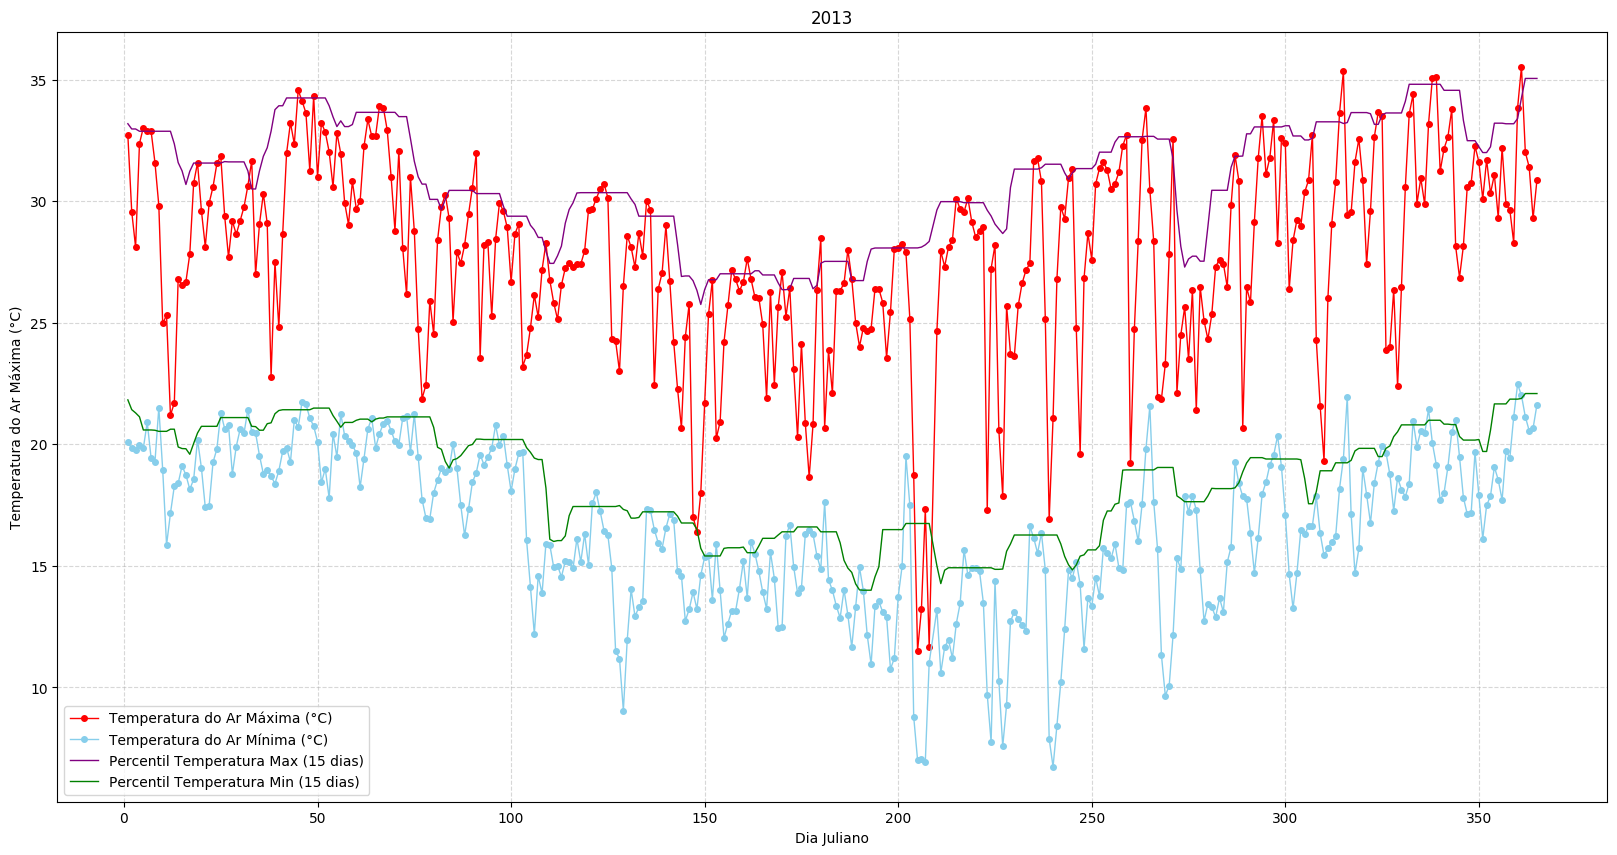

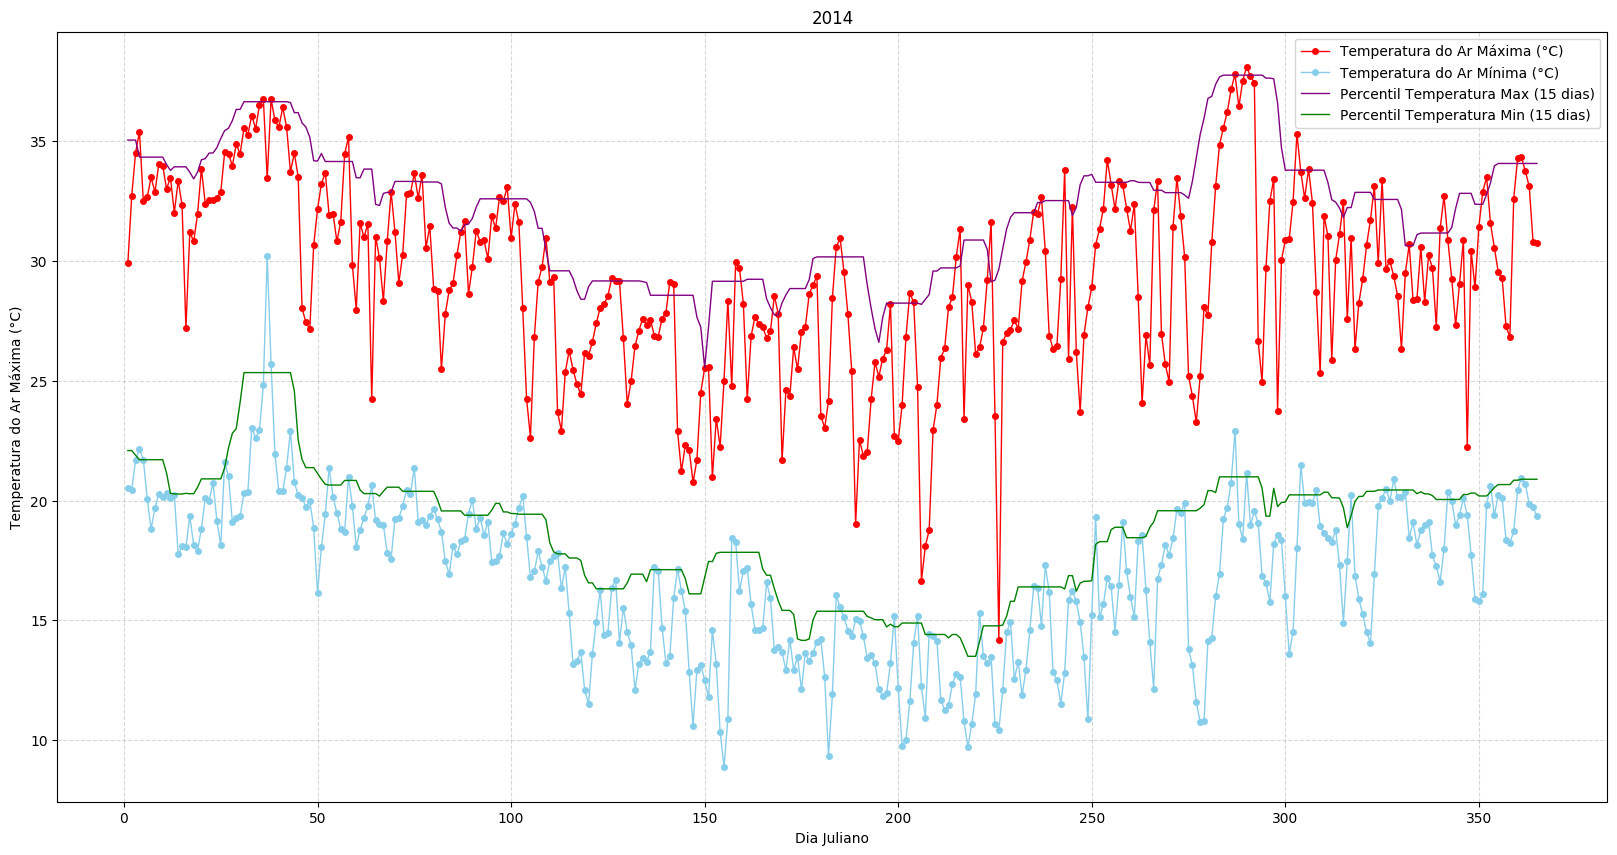

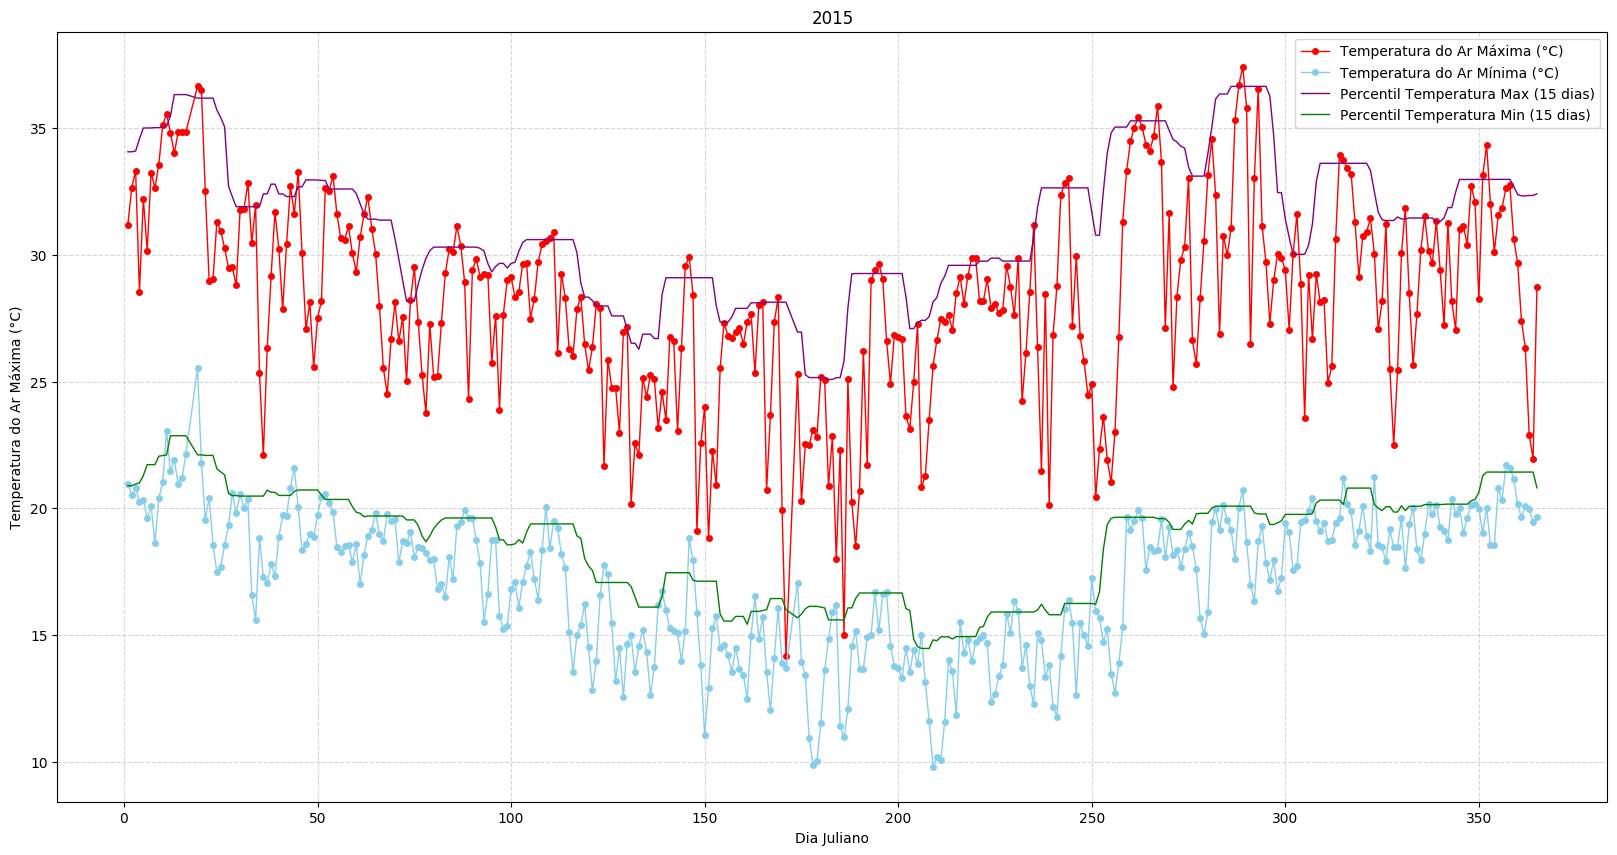

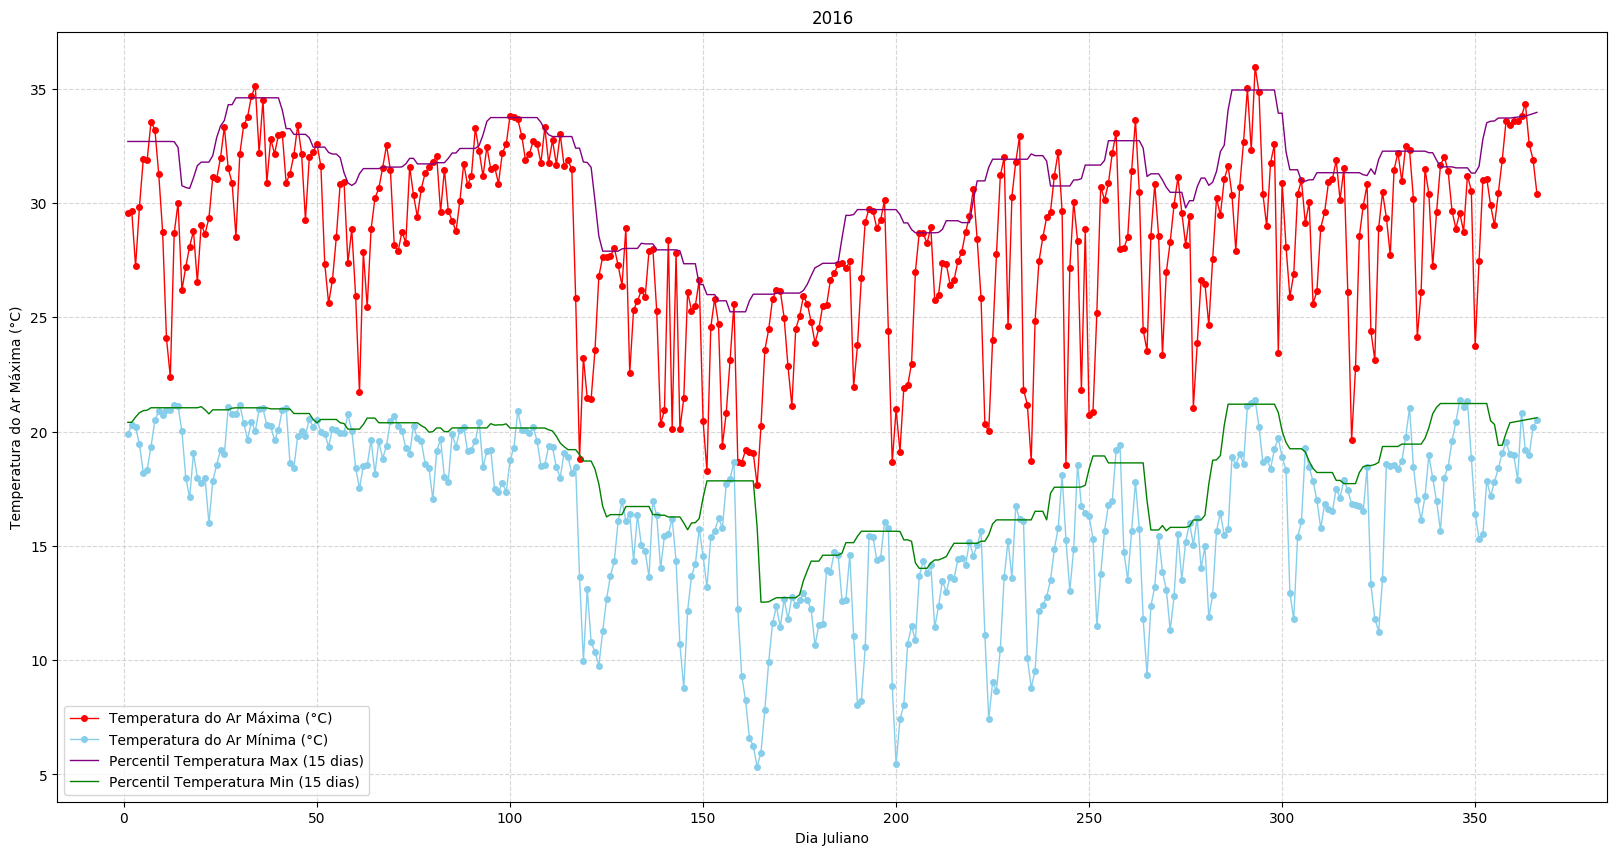

In [20]:
min_x_value = daily_analysis_data_frame[columns.MAX_TEMP].min() - 5
max_x_value = daily_analysis_data_frame[columns.MAX_TEMP].max() + 5

min_y_value = daily_analysis_data_frame[columns.DAY_OF_YEAR].min() - 5
max_y_value = daily_analysis_data_frame[columns.DAY_OF_YEAR].max() + 5

for i in daily_analysis_data_frame[columns.YEAR].unique():
    data_2plot = daily_analysis_data_frame[(daily_analysis_data_frame[columns.YEAR] == i)]
#     data_2plot = data_2plot[data_2plot[_DAY_OF_YEAR_COLUMN]>=200]
#     data_2plot = data_2plot[data_2plot[_DAY_OF_YEAR_COLUMN]<=250]
    
    plt.figure(figsize=(20,10))
    plt.title(str(i))    
    plt.plot( columns.DAY_OF_YEAR, columns.MAX_TEMP, data=data_2plot, color='red', linewidth=1,marker='o', markerfacecolor='red', markersize=4)
    plt.plot( columns.DAY_OF_YEAR, columns.MIN_TEMP, data=data_2plot, color='skyblue', linewidth=1,marker='o', markerfacecolor='skyblue', markersize=4)
    plt.plot( columns.DAY_OF_YEAR, columns.QUANTILE_MAX_TEMP_FIFTEEN_DAYS, data=data_2plot, color='purple', linewidth=1)
    plt.plot( columns.DAY_OF_YEAR, columns.QUANTILE_MIN_TEMP_FIFTEEN_DAYS, data=data_2plot, color='green', linewidth=1)
    plt.legend()
    plt.xlabel(columns.DAY_OF_YEAR)
    plt.ylabel(columns.MAX_TEMP)
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.show()